In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import catboost as cb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error,r2_score

%matplotlib inline
sns.set(color_codes=True)

# Data Description

In [2]:
Products_data=pd.read_csv('../DataSets/ProductsData.csv')
Products_data.index=range(1,len(Products_data)+1)
Products_data.head()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
1,"""chambre a coucher ""","""40008817""","""Meubles et décoration """,1 800,"""private""","""Grand Casablanca""","""Casablanca"""
2,"""Comte free fire""","""40008816""","""Jeux vidéo et consoles """,,"""private""","""Grand Casablanca""","""Casablanca"""
3,"""Iphone 6 plus""","""40008815""","""Téléphones """,,"""private""","""Grand Casablanca""","""Casablanca"""
4,"""Renault ""","""40008814""","""Voitures """,,"""private""","""Chaouia-Ouardigha""","""Settat"""
5,"""PS3 SLIM 360 GB ""","""40008812""","""Jeux vidéo et consoles """,1 400,"""private""","""Rabat-Salé-Zemmour-Zaër""","""Sala Al-Jadida"""


In [3]:
Products_data.shape

(4350, 7)

In [4]:
Products_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4350 entries, 1 to 4350
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Product_name              4350 non-null   object
 1   Product_id                4350 non-null   object
 2   Product_Category          4350 non-null   object
 3   price                     3580 non-null   object
 4   Professional_Publication  4350 non-null   object
 5   Region_address            4350 non-null   object
 6   Local_address             4350 non-null   object
dtypes: object(7)
memory usage: 238.0+ KB


In [5]:
Products_data.describe()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
count,4350,4350,4350,3580,4350,4350,4350
unique,3407,3739,45,529,2,16,124
top,"""Renault""","""39235089""","""Voitures """,,"""private""","""Grand Casablanca""","""Casablanca"""
freq,18,3,654,451,2688,1355,1272


# Data Cleaning

**Removing all the double quotes from each element in the features**

In [6]:
for i,col in enumerate(Products_data.columns):
    Products_data.iloc[:,i]=Products_data.iloc[:,i].str.replace('"','')
Products_data.head()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
1,chambre a coucher,40008817,Meubles et décoration,1 800,private,Grand Casablanca,Casablanca
2,Comte free fire,40008816,Jeux vidéo et consoles,,private,Grand Casablanca,Casablanca
3,Iphone 6 plus,40008815,Téléphones,,private,Grand Casablanca,Casablanca
4,Renault,40008814,Voitures,,private,Chaouia-Ouardigha,Settat
5,PS3 SLIM 360 GB,40008812,Jeux vidéo et consoles,1 400,private,Rabat-Salé-Zemmour-Zaër,Sala Al-Jadida


**Replacing all empty string values with NaN**

In [7]:
Products_data=Products_data.replace(r'^\s*$',np.NaN,regex=True)
Products_data.head()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
1,chambre a coucher,40008817,Meubles et décoration,1 800,private,Grand Casablanca,Casablanca
2,Comte free fire,40008816,Jeux vidéo et consoles,NaN,private,Grand Casablanca,Casablanca
3,Iphone 6 plus,40008815,Téléphones,NaN,private,Grand Casablanca,Casablanca
4,Renault,40008814,Voitures,NaN,private,Chaouia-Ouardigha,Settat
5,PS3 SLIM 360 GB,40008812,Jeux vidéo et consoles,1 400,private,Rabat-Salé-Zemmour-Zaër,Sala Al-Jadida


**Replacing all the unwanted strings with NaN**

In [8]:
Products_data['Product_name'] = Products_data['Product_name'].apply(lambda x: np.nan if str(x).find('?')>-1 else x)
Products_data.head()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
1,chambre a coucher,40008817,Meubles et décoration,1 800,private,Grand Casablanca,Casablanca
2,Comte free fire,40008816,Jeux vidéo et consoles,NaN,private,Grand Casablanca,Casablanca
3,Iphone 6 plus,40008815,Téléphones,NaN,private,Grand Casablanca,Casablanca
4,Renault,40008814,Voitures,NaN,private,Chaouia-Ouardigha,Settat
5,PS3 SLIM 360 GB,40008812,Jeux vidéo et consoles,1 400,private,Rabat-Salé-Zemmour-Zaër,Sala Al-Jadida


**Removing all the unwanted space in price column**

In [9]:
Products_data['price'] = Products_data['price'].str.replace(' ', '')
Products_data.head()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
1,chambre a coucher,40008817,Meubles et décoration,1800,private,Grand Casablanca,Casablanca
2,Comte free fire,40008816,Jeux vidéo et consoles,NaN,private,Grand Casablanca,Casablanca
3,Iphone 6 plus,40008815,Téléphones,NaN,private,Grand Casablanca,Casablanca
4,Renault,40008814,Voitures,NaN,private,Chaouia-Ouardigha,Settat
5,PS3 SLIM 360 GB,40008812,Jeux vidéo et consoles,1400,private,Rabat-Salé-Zemmour-Zaër,Sala Al-Jadida


In [10]:
print(Products_data.isnull().sum())

Product_name                 380
Product_id                     0
Product_Category               0
price                       1221
Professional_Publication       0
Region_address                 0
Local_address                  0
dtype: int64


**The Price column having missing values can be used as test set, which will we evaluated by the model.**
**The rows with product name as missing values need to be removed, as they will not be useful in evaluation, as they are meaningless.**

In [11]:
i=Products_data['Product_name'].isnull()
data=Products_data[i]
data.shape

(380, 7)

In [12]:
Products_data=Products_data.drop(data.index,axis=0)
Products_data.shape

(3970, 7)

### Separating Test Data from the original Product Dataset

In [13]:
test_data=Products_data[Products_data.isnull().any(axis=1)]
test_data.shape

(1076, 7)

In [14]:
test_data.head()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
2,Comte free fire,40008816,Jeux vidéo et consoles,NaN,private,Grand Casablanca,Casablanca
3,Iphone 6 plus,40008815,Téléphones,NaN,private,Grand Casablanca,Casablanca
4,Renault,40008814,Voitures,NaN,private,Chaouia-Ouardigha,Settat
7,becane,40008811,Motos,NaN,private,Fès-Boulemane,Fès
10,Appartement,40008807,Appartements,NaN,private,Grand Casablanca,Casablanca


In [15]:
test_data.index=range(1,len(test_data)+1)
test_data=test_data.drop('price',axis=1)
test_data.head()

,Product_name,Product_id,Product_Category,Professional_Publication,Region_address,Local_address
1,Comte free fire,40008816,Jeux vidéo et consoles,private,Grand Casablanca,Casablanca
2,Iphone 6 plus,40008815,Téléphones,private,Grand Casablanca,Casablanca
3,Renault,40008814,Voitures,private,Chaouia-Ouardigha,Settat
4,becane,40008811,Motos,private,Fès-Boulemane,Fès
5,Appartement,40008807,Appartements,private,Grand Casablanca,Casablanca


In [16]:
data=test_data.drop_duplicates(subset=None,keep='first',inplace=False)
print('Shape of Original dataset:',test_data.shape)
print('Shape of dataset after dropping duplicates:',data.shape)

Shape of Original dataset: (1076, 6)
Shape of dataset after dropping duplicates: (923, 6)


#### Since, Rows in the test dataset after dropping duplicates is less than the original test dataset, so there exists some duplicates in the given dataset, so, we will drop those for further evaluation.

In [17]:
test_data=data
test_data.shape

(923, 6)

### Dropping the rows with missing values in target variable

In [18]:
Products_data.dropna(axis=0, subset=['price'], inplace=True)

In [19]:
Products_data.describe()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
count,2894,2894,2894,2894,2894,2894,2894
unique,2331,2501,42,507,2,16,98
top,Renault,39241945,Voitures,300,private,Grand Casablanca,Casablanca
freq,16,3,448,98,1827,915,849


In [20]:
print(Products_data.isnull().sum())

Product_name                0
Product_id                  0
Product_Category            0
price                       0
Professional_Publication    0
Region_address              0
Local_address               0
dtype: int64


In [21]:
Products_data.shape

(2894, 7)

In [22]:
Products_data.index=range(1,len(Products_data)+1)

In [23]:
without_duplicate_data=Products_data.drop_duplicates(subset=None,keep='first',inplace=False)

print('Shape of Original dataset:',Products_data.shape)
print('Shape of dataset after dropping duplicates:',without_duplicate_data.shape)

Shape of Original dataset: (2894, 7)
Shape of dataset after dropping duplicates: (2501, 7)


#### Since, Rows in the Product dataset after dropping duplicates is less than the original Product dataset, so there exists some duplicates in the given dataset, so, we will drop those for further evaluation.

In [24]:
Products_data=without_duplicate_data
Products_data.shape

(2501, 7)

In [25]:
Products_data.head()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
1,chambre a coucher,40008817,Meubles et décoration,1800,private,Grand Casablanca,Casablanca
2,PS3 SLIM 360 GB,40008812,Jeux vidéo et consoles,1400,private,Rabat-Salé-Zemmour-Zaër,Sala Al-Jadida
3,Need For Speed Heat Xbox One Neuf,39955729,Jeux vidéo et consoles,549,pro,Grand Casablanca,Casablanca
4,Nikel,40008809,Voitures,75000,private,Gharb-Chrarda-Beni Hssen,Kénitra
5,compte free fire,40008808,Jeux vidéo et consoles,170,private,Grand Casablanca,Casablanca


In [26]:
Products_data['price'] = Products_data['price'].apply(pd.to_numeric)
Products_data['price'].dtype

dtype('int64')

# Model

In [27]:
X=Products_data.drop(['price'],axis=1)
Y=Products_data['price']
X_train,X_valid,Y_train,Y_valid=train_test_split(X,Y,test_size=0.2,random_state=0)

**Label Encoding and sacling of x_train**

In [28]:
cat_col=['Product_name','Product_Category','Professional_Publication','Region_address','Local_address']
num_col=['Product_id']

X_train_copy= X_train.copy()
X_copy      = X_train.copy()

ordinal_encoder=OrdinalEncoder()

X_copy[cat_col]=ordinal_encoder.fit_transform( X_train[cat_col] )
X_copy[num_col]=X_train[num_col]
X_scale_train = pd.DataFrame( scale(X_copy) )
X_scale_train.columns = X_train.columns
X_scale_train.head()


,Product_name,Product_id,Product_Category,Professional_Publication,Region_address,Local_address
0,-1.187161,-0.080921,0.164823,1.304877,-0.101480,0.237942
1,1.721949,0.505941,-0.538983,-0.766356,-0.810301,-0.982491
2,-0.994444,-0.196373,1.132556,1.304877,-0.810301,-0.982491
3,1.314490,-0.080340,-0.011129,-0.766356,0.134794,0.364194
4,0.708808,-0.080992,1.132556,-0.766356,-1.282848,-0.435400


****Label Encoding and sacling of x_valid ****

In [29]:
X_valid_copy= X_valid.copy()
X_copy      = X_valid.copy()

ordinal_encoder=OrdinalEncoder()

X_copy[cat_col] = ordinal_encoder.fit_transform( X_valid[cat_col] )
X_copy[num_col] = X_valid[num_col]
X_scale_valid = pd.DataFrame( scale(X_copy) )
X_scale_valid.columns = X_valid.columns
X_scale_valid.index=range(1,len(X_scale_valid)+1)
X_scale_valid.head()


,Product_name,Product_id,Product_Category,Professional_Publication,Region_address,Local_address
1,-0.557537,0.518776,0.786927,1.211602,-0.736498,-0.898404
2,-0.941285,-0.023108,-1.341541,-0.825353,0.835883,1.148836
3,-1.262237,-0.022856,-0.180559,-0.825353,0.311756,1.660646
4,1.298405,0.522085,1.173921,-0.825353,-1.260625,-0.386594
5,0.886748,0.357926,1.173921,-0.825353,-0.998562,0.125216


### Linear Regression

In [30]:
model_LR=LinearRegression()
model_LR.fit(X_scale_train,Y_train)
Y_pred_LR=model_LR.predict(X_scale_valid)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


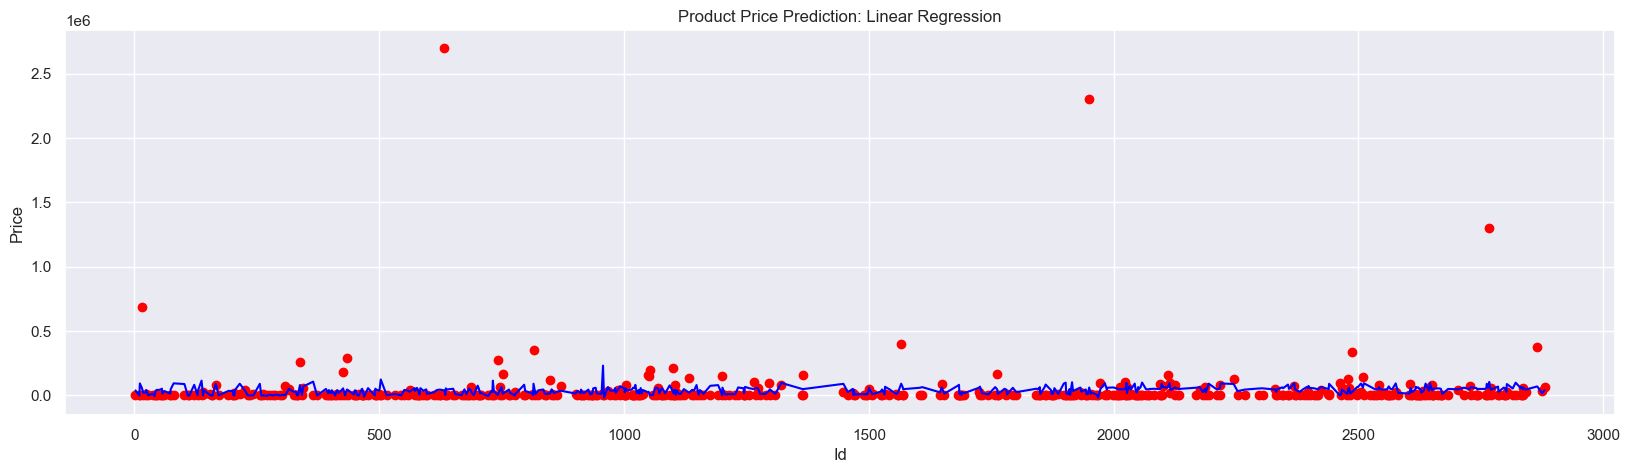

In [31]:
plt.figure(figsize=(20,5))
plt.scatter(X_valid.index, Y_valid, color = 'red')
sns.lineplot(X_valid.index,Y_pred_LR, color = 'blue')
plt.title('Product Price Prediction: Linear Regression')
plt.xlabel('Id')
plt.ylabel('Price')
plt.show()

In [32]:
print('Mean Absolute Error:',mean_absolute_error(Y_valid,Y_pred_LR))
print('Linear Regression Coefficients:',model_LR.coef_)
print('R2 Score:',r2_score(Y_valid,Y_pred_LR))
print('Mean Squared Error:',mean_squared_error(Y_valid,Y_pred_LR))
print('Final Score:',(r2_score(Y_valid,Y_pred_LR)*100)/(mean_squared_error(Y_valid,Y_pred_LR)+mean_absolute_error(Y_valid,Y_pred_LR)))

Mean Absolute Error: 54779.87756082182
Linear Regression Coefficients: [  2670.47297531 -17309.37571783  -1747.79430095 -17738.94952266
  11396.7818184  -16930.75282577]
R2 Score: 1.1843103309150393e-06
Mean Squared Error: 31154963883.627747
Final Score: 3.8013468831663046e-15


### Logistic Regression

In [33]:
model_LGR=LogisticRegression()
model_LGR.fit(X_scale_train,Y_train)
Y_pred_LGR=model_LGR.predict(X_scale_valid)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


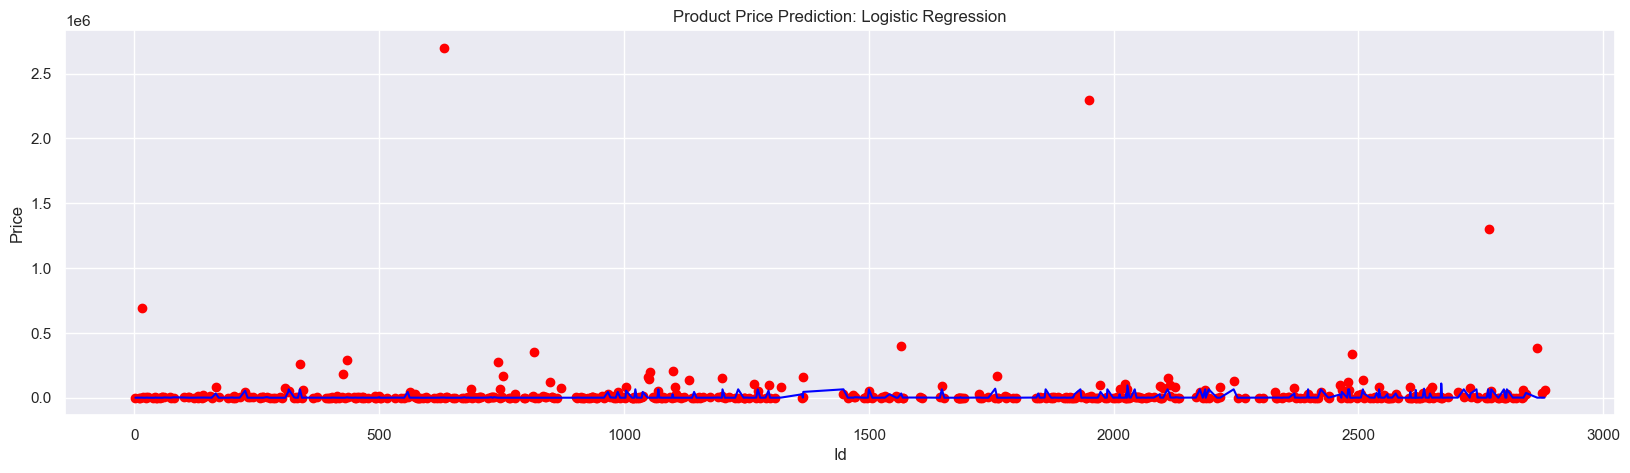

In [34]:
plt.figure(figsize=(20,5))
plt.scatter(X_valid.index, Y_valid, color = 'red')
sns.lineplot(X_valid.index,Y_pred_LGR, color = 'blue')
plt.title('Product Price Prediction: Logistic Regression')
plt.xlabel('Id')
plt.ylabel('Price')
plt.show()

In [35]:
print('Mean Absolute Error:',mean_absolute_error(Y_valid,Y_pred_LGR))
print('Linear Regression Coefficients:\n',model_LGR.coef_)
print('R2 Score:',r2_score(Y_valid,Y_pred_LGR))
print('Mean Squared Error:',mean_squared_error(Y_valid,Y_pred_LGR))
print('Final Score:',(r2_score(Y_valid,Y_pred_LGR)*100)/(mean_squared_error(Y_valid,Y_pred_LGR)+mean_absolute_error(Y_valid,Y_pred_LGR)))

Mean Absolute Error: 31854.82235528942
Linear Regression Coefficients:
 [[ 0.48579146 -0.28105473 -0.4543577  -0.9406714  -0.39513476  0.59861469]
 [ 0.83748533 -0.49646115  0.56038469  0.79268056 -0.32401244 -0.44527088]
 [-0.25983203 -0.19862823 -0.83294788 -0.73014495 -0.77312611  0.70994535]
 ...
 [ 0.36642784 -0.13952841 -0.33910218 -0.42630418 -0.31129103 -0.46607233]
 [ 0.69794678 -0.1552805  -0.33625127 -0.36088425  0.75724574 -0.86876827]
 [ 0.95659792  0.18277923 -0.34323768 -0.39592265  0.70263262  0.638129  ]]
R2 Score: -0.022109332609999477
Mean Squared Error: 31843817055.54491
Final Score: -6.943046574624788e-11


### Kernel Ridge Regression

In [36]:
model_KRR=KernelRidge(kernel='rbf', alpha=0.1, gamma=0.1)
model_KRR.fit(X_scale_train,Y_train)
Y_pred_KRR=model_KRR.predict(X_scale_valid)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


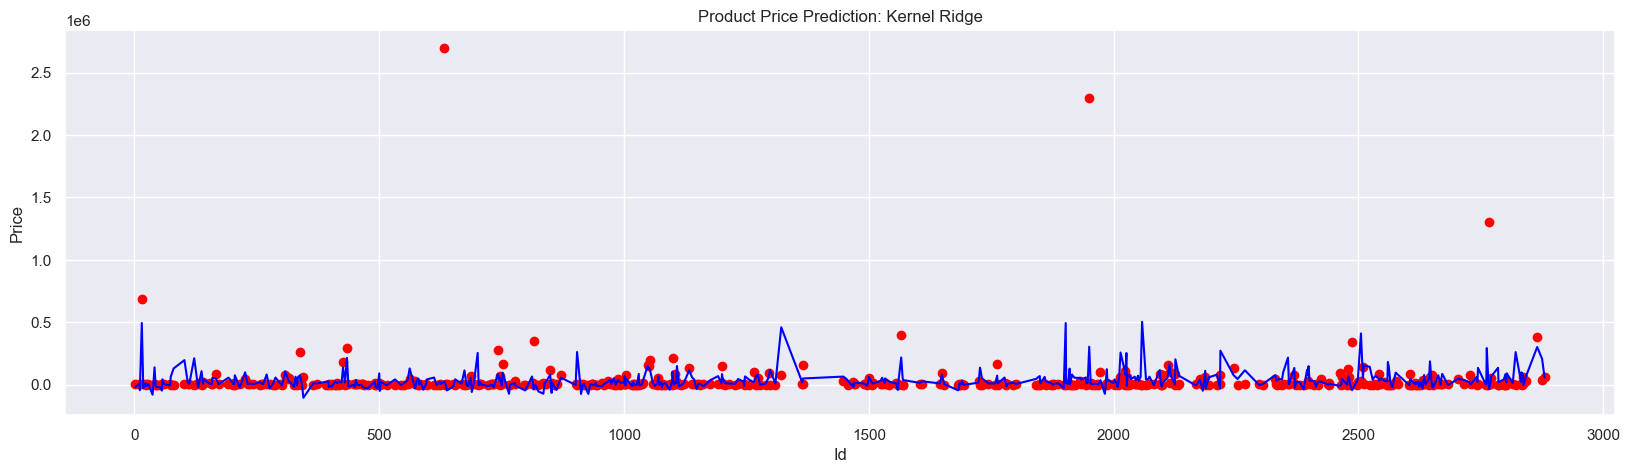

In [37]:
plt.figure(figsize=(20,5))
plt.scatter(X_valid.index, Y_valid, color='red')
sns.lineplot(X_valid.index,Y_pred_KRR, color='blue')
plt.title('Product Price Prediction: Kernel Ridge')
plt.xlabel('Id')
plt.ylabel('Price')
plt.show()

In [38]:
print('Mean Absolute Error:',mean_absolute_error(Y_valid,Y_pred_KRR))
print('R2 Score:',r2_score(Y_valid,Y_pred_KRR))
print('Mean Squared Error:',mean_squared_error(Y_valid,Y_pred_KRR))
print('Final Score:',(r2_score(Y_valid,Y_pred_KRR)*100)/(mean_squared_error(Y_valid,Y_pred_KRR)+mean_absolute_error(Y_valid,Y_pred_KRR)))

Mean Absolute Error: 54700.13015249944
R2 Score: -0.011631262102228535
Mean Squared Error: 31517372760.693855
Final Score: -3.6904224231771864e-11


### XGBoost Regressor

In [39]:
model_XGB = XGBRegressor(n_estimators=500, learning_rate=0.05)
model_XGB.fit(X_scale_train, Y_train, early_stopping_rounds=5, eval_set=[(X_scale_valid, Y_valid)], verbose=False)
Y_pred_XGB=model_XGB.predict(X_scale_valid)

C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


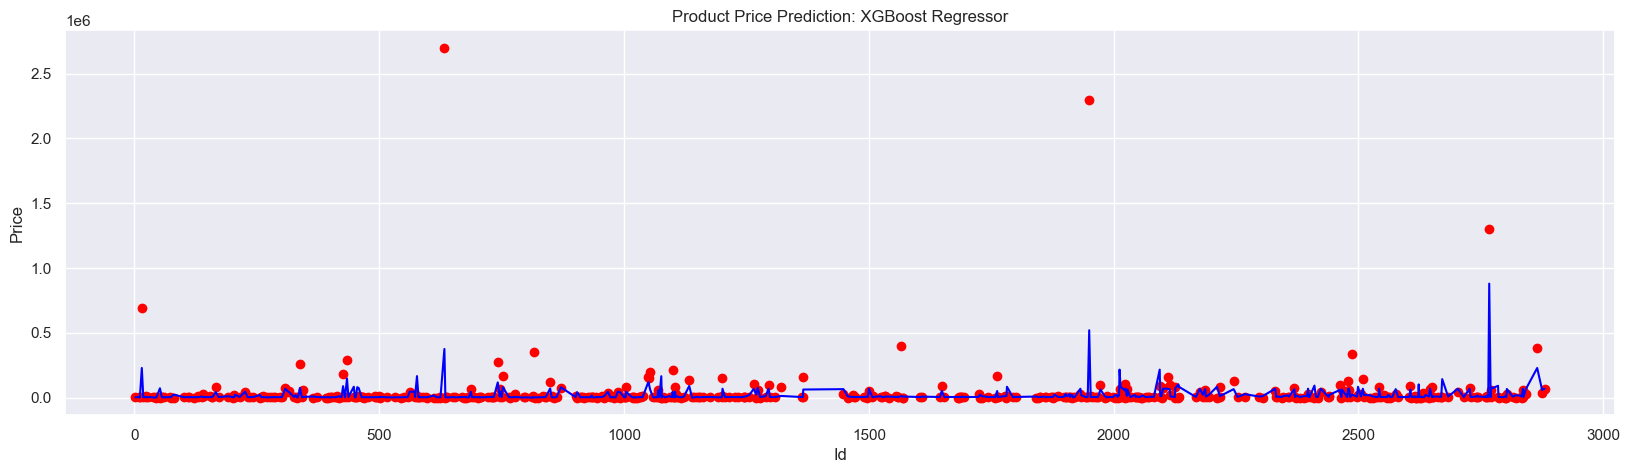

In [40]:
plt.figure(figsize=(20,5))
plt.scatter(X_valid.index,Y_valid,color='red')
sns.lineplot(X_valid.index,Y_pred_XGB,color='blue')
plt.title('Product Price Prediction: XGBoost Regressor')
plt.xlabel('Id')
plt.ylabel('Price')
plt.show()

In [41]:
print('Mean Absolute Error:',mean_absolute_error(Y_valid,Y_pred_XGB))
print('R2 Score:',r2_score(Y_valid,Y_pred_XGB))
print('Mean Squared Error:',mean_squared_error(Y_valid,Y_pred_XGB))
print('Final Score:',(r2_score(Y_valid,Y_pred_XGB)*100)/(mean_squared_error(Y_valid,Y_pred_XGB)+mean_absolute_error(Y_valid,Y_pred_XGB)))

Mean Absolute Error: 26538.697816022617
R2 Score: 0.36905863894055624
Mean Squared Error: 19656978596.45673
Final Score: 1.8774916952152213e-09


### Random Forest Regressor

In [42]:
model_RFR = RandomForestRegressor(n_estimators=100, random_state=0)
model_RFR.fit(X_scale_train,Y_train)
Y_pred_RFR=model_RFR.predict(X_scale_valid)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


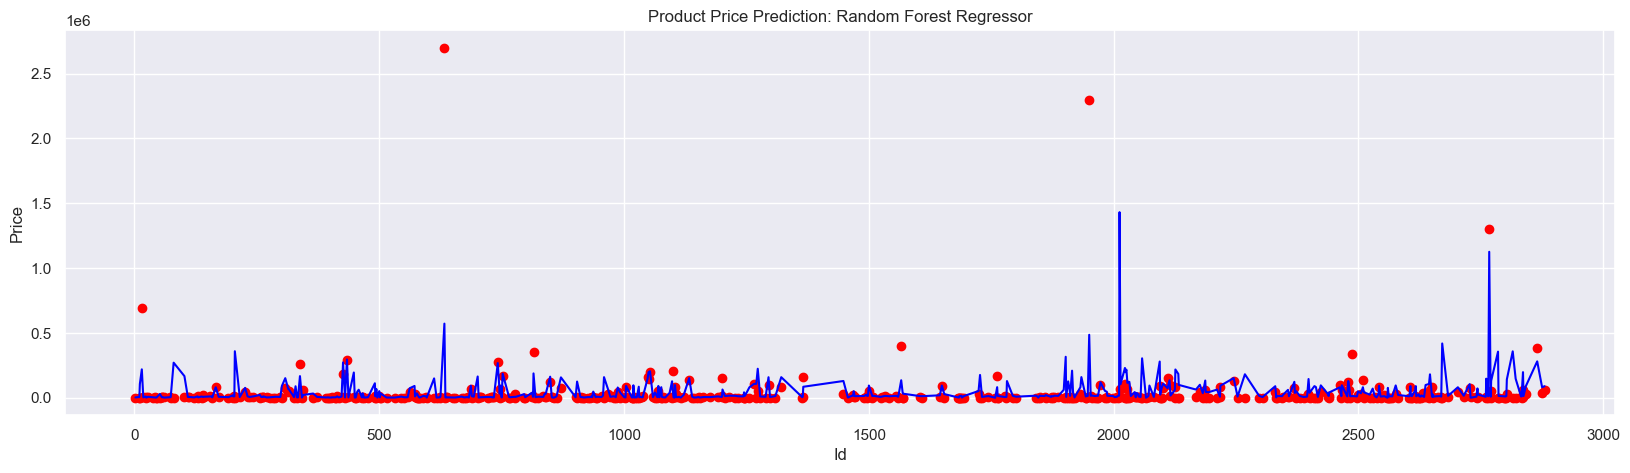

In [43]:
plt.figure(figsize=(20,5))
plt.scatter(X_valid.index,Y_valid,color='red')
sns.lineplot(X_valid.index,Y_pred_RFR,color='blue')
plt.title('Product Price Prediction: Random Forest Regressor')
plt.xlabel('Id')
plt.ylabel('Price')
plt.show()

In [44]:
print('Mean Absolute Error:',mean_absolute_error(Y_valid,Y_pred_RFR))
print('R2 Score:',r2_score(Y_valid,Y_pred_RFR))
print('Mean Squared Error:',mean_squared_error(Y_valid,Y_pred_RFR))
print('Final Score:',(r2_score(Y_valid,Y_pred_RFR)*100)/(mean_squared_error(Y_valid,Y_pred_RFR)+mean_absolute_error(Y_valid,Y_pred_RFR)))

Mean Absolute Error: 44294.95768463074
R2 Score: 0.22149031914912864
Mean Squared Error: 24254469714.782516
Final Score: 9.13192154912615e-10


### Support Vector Regressor

In [45]:
model_SVR=SVR(kernel='rbf')
model_SVR.fit(X_scale_train,Y_train)
Y_pred_SVR=model_SVR.predict(X_scale_valid)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


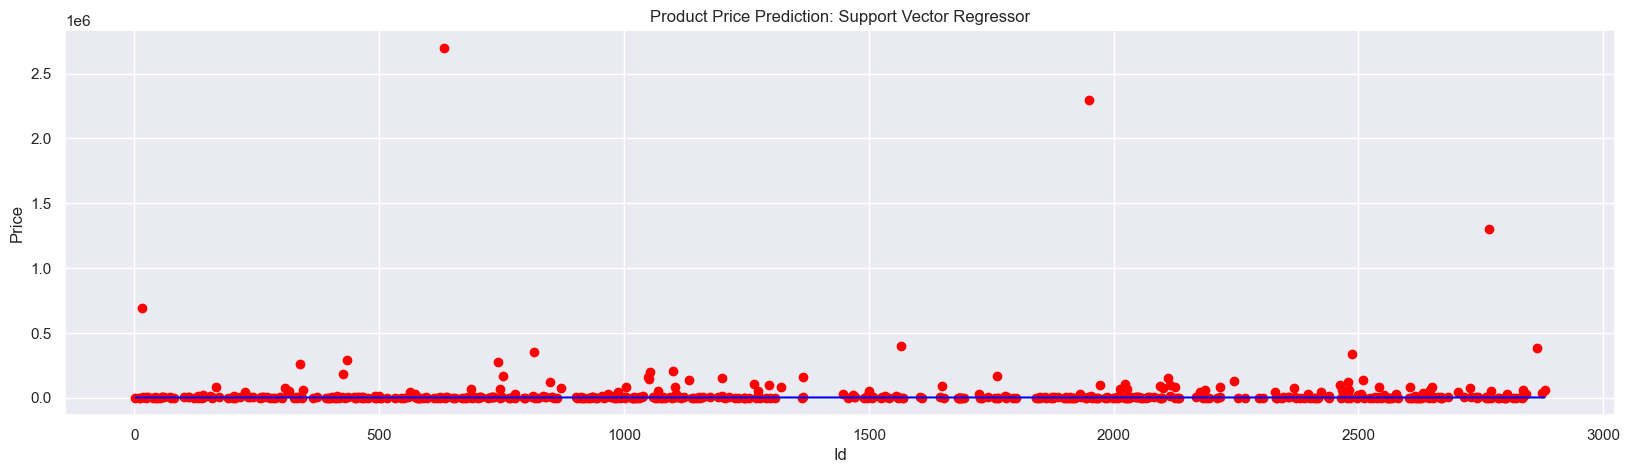

In [46]:
plt.figure(figsize=(20,5))
plt.scatter(X_valid.index,Y_valid,color='red')
sns.lineplot(X_valid.index,Y_pred_SVR,color='blue')
plt.title('Product Price Prediction: Support Vector Regressor')
plt.xlabel('Id')
plt.ylabel('Price')
plt.show()

In [47]:
print('Mean Absolute Error:',mean_absolute_error(Y_valid,Y_pred_SVR))
print('R2 Score:',r2_score(Y_valid,Y_pred_SVR))
print('Mean Squared Error:',mean_squared_error(Y_valid,Y_pred_SVR))
print('Final Score:',(r2_score(Y_valid,Y_pred_SVR)*100)/(mean_squared_error(Y_valid,Y_pred_SVR)+mean_absolute_error(Y_valid,Y_pred_SVR)))

Mean Absolute Error: 32076.716595660484
R2 Score: -0.030530293462373015
Mean Squared Error: 32106172097.47584
Final Score: -9.509156951949441e-11


### Isolation Forest Regressor 

In [48]:
model_IFR = IsolationForest()
model_IFR.fit(X_scale_train)
Y_pred_IFR=-model_IFR.decision_function(X_scale_valid)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


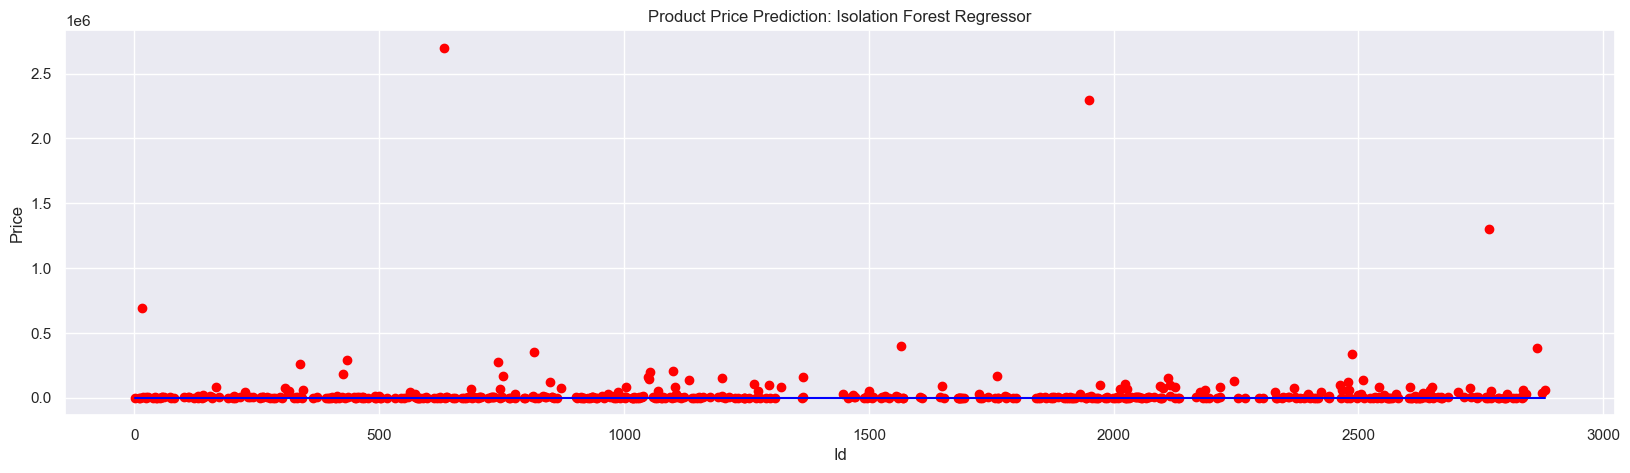

In [49]:
plt.figure(figsize=(20,5))
plt.scatter(X_valid.index,Y_valid,color='red')
sns.lineplot(X_valid.index,Y_pred_IFR,color='blue')
plt.title('Product Price Prediction: Isolation Forest Regressor')
plt.xlabel('Id')
plt.ylabel('Price')
plt.show()

In [50]:
print('Mean Absolute Error:',mean_absolute_error(Y_valid,Y_pred_IFR))
print('R2 Score:',r2_score(Y_valid,Y_pred_IFR))
print('Mean Squared Error:',mean_squared_error(Y_valid,Y_pred_IFR))
print('Final Score:',(r2_score(Y_valid,Y_pred_IFR)*100)/(mean_squared_error(Y_valid,Y_pred_IFR)+mean_absolute_error(Y_valid,Y_pred_IFR)))

Mean Absolute Error: 32919.66357377576
R2 Score: -0.0347842517874295
Mean Squared Error: 32238704172.41454
Final Score: -1.0789582634109102e-10


### Light GBM 

In [53]:
train_X = lgb.Dataset(X_scale_train,label=Y_train)
params = {'learning_rate': 0.05,'application': 'regression','max_depth': 3,'num_leaves': 50,'verbosity': -1,'metric': 'RMSE'}
gbm = lgb.train(params, train_set=train_X, num_boost_round=3200)
Y_pred_LGBM = gbm.predict(X_scale_valid, num_iteration=gbm.best_iteration)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


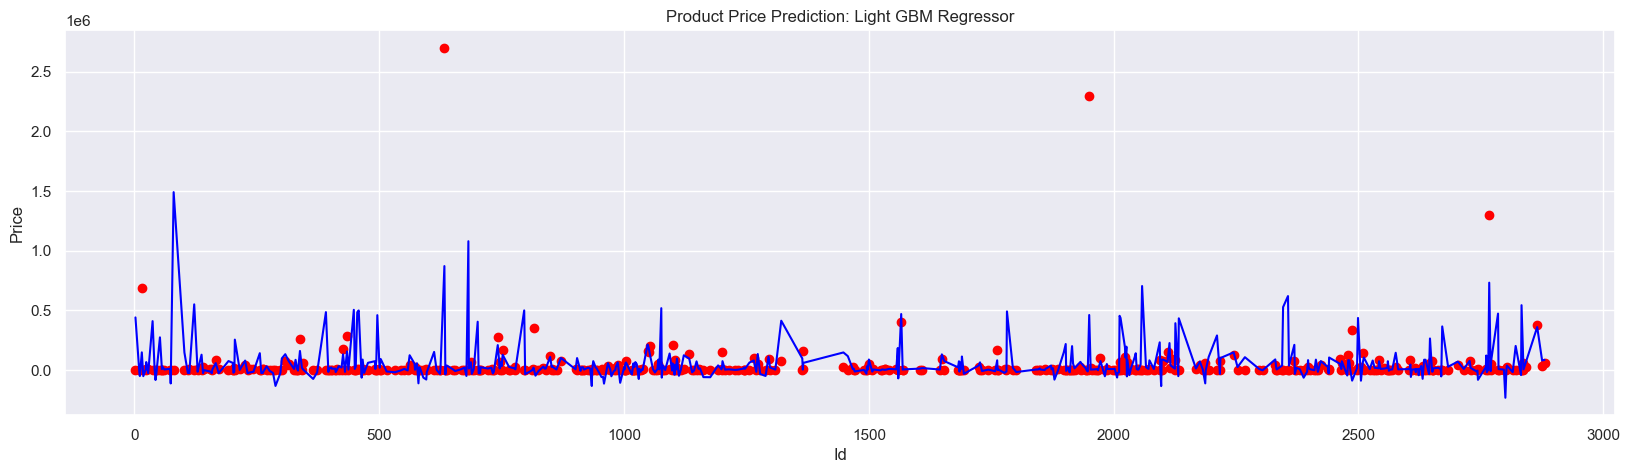

In [54]:
plt.figure(figsize=(20,5))
plt.scatter(X_valid.index,Y_valid,color='red')
sns.lineplot(X_valid.index,Y_pred_LGBM,color='blue')
plt.title('Product Price Prediction: Light GBM Regressor')
plt.xlabel('Id')
plt.ylabel('Price')
plt.show()

In [55]:
print('Mean Absolute Error:',mean_absolute_error(Y_valid,Y_pred_LGBM))
print('R2 Score:',r2_score(Y_valid,Y_pred_LGBM))
print('Mean Squared Error:',mean_squared_error(Y_valid,Y_pred_LGBM))
print('Final Score:',(r2_score(Y_valid,Y_pred_LGBM)*100)/(mean_squared_error(Y_valid,Y_pred_LGBM)+mean_absolute_error(Y_valid,Y_pred_LGBM)))

Mean Absolute Error: 74561.12723597565
R2 Score: -0.16417064592494546
Mean Squared Error: 36269737382.795944
Final Score: -4.526371578070766e-10


### CAT Boost Regressor

In [56]:
train_dataset = cb.Pool(X_scale_train,Y_train) 
test_dataset = cb.Pool(X_scale_valid,Y_valid)
model_CAT = cb.CatBoostRegressor(loss_function='RMSE')
grid = {'iterations': [100, 150, 200],'learning_rate': [0.03,0.05,0.1],'depth': [2, 4, 6, 8],'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model_CAT.grid_search(grid,train_dataset)
Y_pred_CAT=model_CAT.predict(X_scale_valid)

0:	learn: 218610.8475965	test: 246536.6373771	best: 246536.6373771 (0)	total: 178ms	remaining: 17.6s
1:	learn: 218279.3066981	test: 246325.5051692	best: 246325.5051692 (1)	total: 180ms	remaining: 8.82s
2:	learn: 217876.9312541	test: 246138.0204426	best: 246138.0204426 (2)	total: 182ms	remaining: 5.88s
3:	learn: 217562.8292467	test: 245852.6969618	best: 245852.6969618 (3)	total: 185ms	remaining: 4.43s
4:	learn: 217353.6890807	test: 245578.2918504	best: 245578.2918504 (4)	total: 187ms	remaining: 3.54s
5:	learn: 217092.6745962	test: 245376.3859869	best: 245376.3859869 (5)	total: 189ms	remaining: 2.96s
6:	learn: 216906.5768967	test: 245144.5672383	best: 245144.5672383 (6)	total: 191ms	remaining: 2.53s
7:	learn: 216664.3772079	test: 244988.8692340	best: 244988.8692340 (7)	total: 193ms	remaining: 2.21s
8:	learn: 216453.4503005	test: 244836.4928874	best: 244836.4928874 (8)	total: 194ms	remaining: 1.97s
9:	learn: 216203.3373989	test: 244595.0501889	best: 244595.0501889 (9)	total: 196ms	remaini

17:	learn: 214818.9522972	test: 243460.4152813	best: 243460.4152813 (17)	total: 7.89ms	remaining: 36ms
18:	learn: 214703.0978977	test: 243316.9667247	best: 243316.9667247 (18)	total: 8.59ms	remaining: 36.6ms
19:	learn: 214420.2468892	test: 243181.3063819	best: 243181.3063819 (19)	total: 9.04ms	remaining: 36.1ms
20:	learn: 214250.0443450	test: 243021.3465919	best: 243021.3465919 (20)	total: 9.47ms	remaining: 35.6ms
21:	learn: 213488.7063170	test: 242795.9424317	best: 242795.9424317 (21)	total: 9.91ms	remaining: 35.1ms
22:	learn: 213380.4974224	test: 242672.9475681	best: 242672.9475681 (22)	total: 10.3ms	remaining: 34.6ms
23:	learn: 213277.8752701	test: 242560.7876915	best: 242560.7876915 (23)	total: 10.8ms	remaining: 34.1ms
24:	learn: 213172.0988569	test: 242433.0385738	best: 242433.0385738 (24)	total: 11.2ms	remaining: 33.7ms
25:	learn: 210584.5159546	test: 239156.6986992	best: 239156.6986992 (25)	total: 11.7ms	remaining: 33.2ms
26:	learn: 210490.4954244	test: 239024.5153537	best: 2390

52:	learn: 207737.6501801	test: 237817.0671259	best: 237817.0671259 (52)	total: 38.8ms	remaining: 34.4ms
53:	learn: 207694.8880619	test: 237741.5673224	best: 237741.5673224 (53)	total: 39.4ms	remaining: 33.6ms
54:	learn: 207592.9253338	test: 237600.6965165	best: 237600.6965165 (54)	total: 39.8ms	remaining: 32.6ms
55:	learn: 207428.8046068	test: 237561.0256487	best: 237561.0256487 (55)	total: 40.3ms	remaining: 31.6ms
56:	learn: 207291.3489820	test: 237465.5142872	best: 237465.5142872 (56)	total: 40.7ms	remaining: 30.7ms
57:	learn: 207250.0710319	test: 237415.4416056	best: 237415.4416056 (57)	total: 41.1ms	remaining: 29.8ms
58:	learn: 207167.0760478	test: 237454.2541392	best: 237415.4416056 (57)	total: 41.6ms	remaining: 28.9ms
59:	learn: 207097.0457143	test: 237416.2721066	best: 237415.4416056 (57)	total: 42ms	remaining: 28ms
60:	learn: 207028.4066876	test: 237365.1576268	best: 237365.1576268 (60)	total: 42.5ms	remaining: 27.1ms
61:	learn: 204778.7259574	test: 234532.5650220	best: 234532

34:	learn: 203734.0671192	test: 233164.3031449	best: 233131.8497683 (33)	total: 15.3ms	remaining: 28.5ms
35:	learn: 203609.9453449	test: 233086.3167333	best: 233086.3167333 (35)	total: 16ms	remaining: 28.5ms
36:	learn: 203455.2598579	test: 232930.3662592	best: 232930.3662592 (36)	total: 16.5ms	remaining: 28.1ms
37:	learn: 203267.4571410	test: 232984.5441091	best: 232930.3662592 (36)	total: 16.9ms	remaining: 27.6ms
38:	learn: 203178.2373531	test: 233013.0887753	best: 232930.3662592 (36)	total: 17.3ms	remaining: 27.1ms
39:	learn: 203069.1628904	test: 232883.4097812	best: 232883.4097812 (39)	total: 17.8ms	remaining: 26.7ms
40:	learn: 202838.8904090	test: 232847.6640553	best: 232847.6640553 (40)	total: 18.2ms	remaining: 26.2ms
41:	learn: 202671.7335095	test: 232824.8266205	best: 232824.8266205 (41)	total: 18.7ms	remaining: 25.8ms
42:	learn: 202459.3018726	test: 232870.8565224	best: 232824.8266205 (41)	total: 19.1ms	remaining: 25.3ms
43:	learn: 199673.3647183	test: 229395.9316381	best: 2293

24:	learn: 211329.0075038	test: 241730.7182177	best: 241730.7182177 (24)	total: 11.6ms	remaining: 58.2ms
25:	learn: 206926.3814626	test: 236143.4792048	best: 236143.4792048 (25)	total: 12.3ms	remaining: 58.5ms
26:	learn: 206833.7689279	test: 236000.6322329	best: 236000.6322329 (26)	total: 12.7ms	remaining: 57.7ms
27:	learn: 206621.9255239	test: 235904.0970534	best: 235904.0970534 (27)	total: 13.1ms	remaining: 57ms
28:	learn: 206362.4198316	test: 235841.4188670	best: 235841.4188670 (28)	total: 13.5ms	remaining: 56.5ms
29:	learn: 206122.9626666	test: 235833.7419752	best: 235833.7419752 (29)	total: 14ms	remaining: 56ms
30:	learn: 202073.2476844	test: 230732.9784359	best: 230732.9784359 (30)	total: 14.4ms	remaining: 55.3ms
31:	learn: 201927.1545759	test: 230560.3071805	best: 230560.3071805 (31)	total: 14.8ms	remaining: 54.7ms
32:	learn: 201661.7559454	test: 230565.6730989	best: 230560.3071805 (31)	total: 15.3ms	remaining: 54.2ms
33:	learn: 201579.7727283	test: 230546.3124349	best: 230546.3

102:	learn: 190992.0877583	test: 221639.9900506	best: 221639.9900506 (102)	total: 43.9ms	remaining: 20ms
103:	learn: 190839.2541304	test: 221652.2437008	best: 221639.9900506 (102)	total: 44.6ms	remaining: 19.7ms
104:	learn: 190788.3778911	test: 221594.5675074	best: 221594.5675074 (104)	total: 45ms	remaining: 19.3ms
105:	learn: 190753.5965201	test: 221580.9288467	best: 221580.9288467 (105)	total: 45.4ms	remaining: 18.8ms
106:	learn: 190708.7943379	test: 221529.1537761	best: 221529.1537761 (106)	total: 45.9ms	remaining: 18.4ms
107:	learn: 190671.0729823	test: 221408.8680543	best: 221408.8680543 (107)	total: 46.3ms	remaining: 18ms
108:	learn: 190642.8822467	test: 221364.5252112	best: 221364.5252112 (108)	total: 46.7ms	remaining: 17.6ms
109:	learn: 190551.5926845	test: 221350.6183171	best: 221350.6183171 (109)	total: 47.1ms	remaining: 17.1ms
110:	learn: 190507.8027478	test: 221300.3493073	best: 221300.3493073 (110)	total: 47.6ms	remaining: 16.7ms
111:	learn: 190280.6967607	test: 220754.816

53:	learn: 207694.8880619	test: 237741.5673224	best: 237741.5673224 (53)	total: 24ms	remaining: 42.7ms
54:	learn: 207592.9253338	test: 237600.6965165	best: 237600.6965165 (54)	total: 24.7ms	remaining: 42.7ms
55:	learn: 207428.8046068	test: 237561.0256487	best: 237561.0256487 (55)	total: 25.1ms	remaining: 42.2ms
56:	learn: 207291.3489820	test: 237465.5142872	best: 237465.5142872 (56)	total: 25.6ms	remaining: 41.7ms
57:	learn: 207250.0710319	test: 237415.4416056	best: 237415.4416056 (57)	total: 26ms	remaining: 41.3ms
58:	learn: 207167.0760478	test: 237454.2541392	best: 237415.4416056 (57)	total: 26.5ms	remaining: 40.8ms
59:	learn: 207097.0457143	test: 237416.2721066	best: 237415.4416056 (57)	total: 27ms	remaining: 40.6ms
60:	learn: 207028.4066876	test: 237365.1576268	best: 237365.1576268 (60)	total: 27.5ms	remaining: 40.1ms
61:	learn: 204778.7259574	test: 234532.5650220	best: 234532.5650220 (61)	total: 28.1ms	remaining: 39.9ms
62:	learn: 204527.9751714	test: 233957.5216634	best: 233957.5

131:	learn: 147963.6123214	test: 186867.7838777	best: 186867.7838777 (131)	total: 58.2ms	remaining: 7.93ms
132:	learn: 147855.5734964	test: 186851.4275531	best: 186851.4275531 (132)	total: 58.7ms	remaining: 7.51ms
133:	learn: 147711.9493431	test: 186956.4361892	best: 186851.4275531 (132)	total: 59.1ms	remaining: 7.06ms
134:	learn: 147680.2757471	test: 186888.7368382	best: 186851.4275531 (132)	total: 59.5ms	remaining: 6.62ms
135:	learn: 147574.3875972	test: 187144.3070458	best: 186851.4275531 (132)	total: 60ms	remaining: 6.18ms
136:	learn: 147520.4849994	test: 187134.5179483	best: 186851.4275531 (132)	total: 60.4ms	remaining: 5.74ms
137:	learn: 147469.7844250	test: 187122.7483202	best: 186851.4275531 (132)	total: 61ms	remaining: 5.31ms
138:	learn: 147392.1988670	test: 187156.0139803	best: 186851.4275531 (132)	total: 61.6ms	remaining: 4.88ms
139:	learn: 147122.3413054	test: 186199.0223064	best: 186199.0223064 (139)	total: 62.3ms	remaining: 4.45ms
140:	learn: 147091.3427629	test: 186097.5

139:	learn: 171954.3345830	test: 203225.9723810	best: 203225.9723810 (139)	total: 60.5ms	remaining: 4.32ms
140:	learn: 171934.0610708	test: 203204.4002773	best: 203204.4002773 (140)	total: 61.2ms	remaining: 3.91ms
141:	learn: 171890.5871254	test: 203205.2206327	best: 203204.4002773 (140)	total: 61.7ms	remaining: 3.47ms
142:	learn: 171627.4628875	test: 202500.8338530	best: 202500.8338530 (142)	total: 62.1ms	remaining: 3.04ms
143:	learn: 171601.9811432	test: 202524.3570854	best: 202500.8338530 (142)	total: 62.5ms	remaining: 2.6ms
144:	learn: 170065.4495453	test: 200710.4225058	best: 200710.4225058 (144)	total: 62.9ms	remaining: 2.17ms
145:	learn: 170055.3220660	test: 200679.8811839	best: 200679.8811839 (145)	total: 63.4ms	remaining: 1.74ms
146:	learn: 169962.8770747	test: 200682.9814278	best: 200679.8811839 (145)	total: 63.8ms	remaining: 1.3ms
147:	learn: 169931.2391825	test: 200637.9674538	best: 200637.9674538 (147)	total: 64.3ms	remaining: 868us
148:	learn: 169750.6717730	test: 200725.

57:	learn: 193704.9595658	test: 224564.1028917	best: 224564.1028917 (57)	total: 26ms	remaining: 63.8ms
58:	learn: 193626.8320855	test: 224652.8350285	best: 224564.1028917 (57)	total: 26.8ms	remaining: 64.1ms
59:	learn: 193545.2473166	test: 224603.7476009	best: 224564.1028917 (57)	total: 27.2ms	remaining: 63.6ms
60:	learn: 193481.4762415	test: 224567.5131539	best: 224564.1028917 (57)	total: 27.7ms	remaining: 63.1ms
61:	learn: 190145.9552369	test: 220457.8620157	best: 220457.8620157 (61)	total: 28.1ms	remaining: 62.5ms
62:	learn: 189718.2744850	test: 219459.6359430	best: 219459.6359430 (62)	total: 28.5ms	remaining: 62ms
63:	learn: 189560.3001641	test: 219473.7670011	best: 219459.6359430 (62)	total: 29ms	remaining: 61.7ms
64:	learn: 189386.2070202	test: 219261.0597207	best: 219261.0597207 (64)	total: 29.5ms	remaining: 61.3ms
65:	learn: 189248.7246226	test: 219255.9730365	best: 219255.9730365 (65)	total: 29.9ms	remaining: 60.7ms
66:	learn: 189169.7281169	test: 219239.2998085	best: 219239.2

85:	learn: 199278.3700640	test: 230071.5995136	best: 230033.2611962 (82)	total: 36.2ms	remaining: 48.1ms
86:	learn: 199195.5403657	test: 230092.1198438	best: 230033.2611962 (82)	total: 37.3ms	remaining: 48.5ms
87:	learn: 199138.8951488	test: 230027.4455373	best: 230027.4455373 (87)	total: 37.8ms	remaining: 48.1ms
88:	learn: 199115.7110527	test: 230001.4483383	best: 230001.4483383 (88)	total: 38.5ms	remaining: 48ms
89:	learn: 196961.2781229	test: 227320.4736391	best: 227320.4736391 (89)	total: 39.8ms	remaining: 48.7ms
90:	learn: 196888.9250062	test: 227218.3816668	best: 227218.3816668 (90)	total: 40.6ms	remaining: 48.6ms
91:	learn: 194832.1890059	test: 224671.7434998	best: 224671.7434998 (91)	total: 41ms	remaining: 48.1ms
92:	learn: 194725.3023663	test: 224706.7835493	best: 224671.7434998 (91)	total: 41.4ms	remaining: 47.6ms
93:	learn: 194688.0312373	test: 224676.1385596	best: 224671.7434998 (91)	total: 42ms	remaining: 47.3ms
94:	learn: 194604.8111569	test: 224673.2470458	best: 224671.7

90:	learn: 156334.9206895	test: 187655.4038173	best: 187630.8125959 (89)	total: 39.4ms	remaining: 47.2ms
91:	learn: 156275.9818522	test: 187582.6809964	best: 187582.6809964 (91)	total: 40ms	remaining: 47ms
92:	learn: 155962.2818525	test: 187888.7796065	best: 187582.6809964 (91)	total: 40.4ms	remaining: 46.5ms
93:	learn: 155887.3092727	test: 187943.2792430	best: 187582.6809964 (91)	total: 40.9ms	remaining: 46.1ms
94:	learn: 155619.9786845	test: 188253.4617509	best: 187582.6809964 (91)	total: 41.3ms	remaining: 45.7ms
95:	learn: 154582.3431663	test: 188240.9041974	best: 187582.6809964 (91)	total: 41.8ms	remaining: 45.3ms
96:	learn: 154359.9463757	test: 188545.0335131	best: 187582.6809964 (91)	total: 42.2ms	remaining: 44.8ms
97:	learn: 154281.0742684	test: 188603.2273425	best: 187582.6809964 (91)	total: 42.8ms	remaining: 44.5ms
98:	learn: 154089.6922064	test: 188904.3286906	best: 187582.6809964 (91)	total: 43.2ms	remaining: 44.1ms
99:	learn: 154017.3021733	test: 188961.3559885	best: 187582

81:	learn: 186912.2602844	test: 217026.9818899	best: 216997.8205648 (80)	total: 38.7ms	remaining: 55.7ms
82:	learn: 186503.2575513	test: 217076.7091048	best: 216997.8205648 (80)	total: 39.3ms	remaining: 55.4ms
83:	learn: 186393.3419605	test: 217074.2023788	best: 216997.8205648 (80)	total: 39.7ms	remaining: 54.8ms
84:	learn: 186329.0193460	test: 216990.7898620	best: 216990.7898620 (84)	total: 40.1ms	remaining: 54.3ms
85:	learn: 186285.5847024	test: 216961.9638493	best: 216961.9638493 (85)	total: 40.6ms	remaining: 53.8ms
86:	learn: 186236.6560536	test: 217019.0854362	best: 216961.9638493 (85)	total: 41ms	remaining: 53.3ms
87:	learn: 186182.2998183	test: 216953.3445682	best: 216953.3445682 (87)	total: 41.4ms	remaining: 52.7ms
88:	learn: 186160.9348989	test: 216927.7743744	best: 216927.7743744 (88)	total: 41.8ms	remaining: 52.2ms
89:	learn: 183533.9819938	test: 213721.3995634	best: 213721.3995634 (89)	total: 42.3ms	remaining: 51.7ms
90:	learn: 183476.5580704	test: 213601.5277091	best: 2136

184:	learn: 138614.0034209	test: 179321.8122428	best: 179321.8122428 (184)	total: 129ms	remaining: 10.5ms
185:	learn: 138451.0427586	test: 178613.2782503	best: 178613.2782503 (185)	total: 130ms	remaining: 9.76ms
186:	learn: 138388.1974980	test: 178697.6388822	best: 178613.2782503 (185)	total: 130ms	remaining: 9.04ms
187:	learn: 138203.0759187	test: 178690.2954927	best: 178613.2782503 (185)	total: 131ms	remaining: 8.33ms
188:	learn: 138168.1429068	test: 178590.8347896	best: 178590.8347896 (188)	total: 131ms	remaining: 7.62ms
189:	learn: 138128.7976491	test: 178542.2985299	best: 178542.2985299 (189)	total: 131ms	remaining: 6.92ms
190:	learn: 138074.9480866	test: 178629.7558845	best: 178542.2985299 (189)	total: 132ms	remaining: 6.21ms
191:	learn: 138034.3532184	test: 178624.7621838	best: 178542.2985299 (189)	total: 132ms	remaining: 5.52ms
192:	learn: 137975.0310072	test: 178659.9008439	best: 178542.2985299 (189)	total: 133ms	remaining: 4.83ms
193:	learn: 137928.8949705	test: 178724.488630

183:	learn: 166183.2446276	test: 199071.7733025	best: 199047.4118150 (182)	total: 77.4ms	remaining: 6.73ms
184:	learn: 166142.6699368	test: 199043.5049755	best: 199043.5049755 (184)	total: 78.2ms	remaining: 6.34ms
185:	learn: 166105.9026477	test: 199018.0130626	best: 199018.0130626 (185)	total: 78.6ms	remaining: 5.92ms
186:	learn: 165999.8061856	test: 199124.1334622	best: 199018.0130626 (185)	total: 79ms	remaining: 5.49ms
187:	learn: 165900.8841285	test: 199230.1036729	best: 199018.0130626 (185)	total: 79.5ms	remaining: 5.07ms
188:	learn: 164499.9281135	test: 197564.8422171	best: 197564.8422171 (188)	total: 79.9ms	remaining: 4.65ms
189:	learn: 164318.8781066	test: 197015.7750169	best: 197015.7750169 (189)	total: 80.4ms	remaining: 4.23ms
190:	learn: 164229.2951702	test: 197119.9508612	best: 197015.7750169 (189)	total: 80.8ms	remaining: 3.81ms
191:	learn: 162915.1847718	test: 195565.9840642	best: 195565.9840642 (191)	total: 81.8ms	remaining: 3.41ms
192:	learn: 162879.0370539	test: 195541

15:	learn: 193040.1521009	test: 229843.1867497	best: 229843.1867497 (15)	total: 11.9ms	remaining: 62.4ms
16:	learn: 192127.4396388	test: 229846.2139326	best: 229843.1867497 (15)	total: 12.7ms	remaining: 62.2ms
17:	learn: 186956.2879387	test: 227498.2784295	best: 227498.2784295 (17)	total: 13.4ms	remaining: 61.1ms
18:	learn: 184560.2955624	test: 227610.2422057	best: 227498.2784295 (17)	total: 14.2ms	remaining: 60.4ms
19:	learn: 184079.8381682	test: 227463.2162548	best: 227463.2162548 (19)	total: 14.9ms	remaining: 59.6ms
20:	learn: 183551.2290860	test: 227523.3757630	best: 227463.2162548 (19)	total: 15.7ms	remaining: 59.1ms
21:	learn: 182743.8735303	test: 227484.8882482	best: 227463.2162548 (19)	total: 16.4ms	remaining: 58.2ms
22:	learn: 182123.4842891	test: 226357.2794147	best: 226357.2794147 (22)	total: 17.1ms	remaining: 57.1ms
23:	learn: 181506.6346378	test: 226383.1585150	best: 226357.2794147 (22)	total: 17.7ms	remaining: 56.1ms
24:	learn: 180530.2597509	test: 226325.0494722	best: 22

84:	learn: 145824.6995909	test: 213962.9682290	best: 213962.9682290 (84)	total: 56.8ms	remaining: 10ms
85:	learn: 145434.0334965	test: 213277.5283660	best: 213277.5283660 (85)	total: 57.8ms	remaining: 9.41ms
86:	learn: 145242.5164700	test: 213305.2781199	best: 213277.5283660 (85)	total: 58.5ms	remaining: 8.74ms
87:	learn: 145044.5663023	test: 212965.3488410	best: 212965.3488410 (87)	total: 59.3ms	remaining: 8.09ms
88:	learn: 144653.6392890	test: 212961.7343326	best: 212961.7343326 (88)	total: 60ms	remaining: 7.41ms
89:	learn: 144083.5138817	test: 213127.5815687	best: 212961.7343326 (88)	total: 60.8ms	remaining: 6.75ms
90:	learn: 143696.8084735	test: 213176.4326620	best: 212961.7343326 (88)	total: 61.4ms	remaining: 6.07ms
91:	learn: 143463.7620205	test: 213150.6572937	best: 212961.7343326 (88)	total: 62ms	remaining: 5.39ms
92:	learn: 142158.9046290	test: 211815.7255225	best: 211815.7255225 (92)	total: 63.5ms	remaining: 4.78ms
93:	learn: 142044.5295833	test: 211810.8457142	best: 211810.8

42:	learn: 186561.7258739	test: 233304.3419154	best: 233304.3419154 (42)	total: 31.3ms	remaining: 41.4ms
43:	learn: 186301.0676353	test: 232804.3571883	best: 232804.3571883 (43)	total: 32.1ms	remaining: 40.9ms
44:	learn: 186000.0852249	test: 232771.2087414	best: 232771.2087414 (44)	total: 32.8ms	remaining: 40.1ms
45:	learn: 184241.9670848	test: 231249.2488178	best: 231249.2488178 (45)	total: 33.6ms	remaining: 39.5ms
46:	learn: 184080.6286763	test: 231175.2416550	best: 231175.2416550 (46)	total: 34.8ms	remaining: 39.2ms
47:	learn: 181916.4034858	test: 230075.6776800	best: 230075.6776800 (47)	total: 36ms	remaining: 39ms
48:	learn: 179645.7610880	test: 228981.9915220	best: 228981.9915220 (48)	total: 37.8ms	remaining: 39.3ms
49:	learn: 179012.8597027	test: 228910.8035004	best: 228910.8035004 (49)	total: 39.6ms	remaining: 39.6ms
50:	learn: 177125.0322084	test: 227042.7544182	best: 227042.7544182 (50)	total: 41ms	remaining: 39.4ms
51:	learn: 176455.2776037	test: 227035.7322101	best: 227035.7

62:	learn: 112941.4862076	test: 199164.4090421	best: 198085.1205873 (60)	total: 60.2ms	remaining: 35.4ms
63:	learn: 111912.9103589	test: 199186.0975034	best: 198085.1205873 (60)	total: 61.3ms	remaining: 34.5ms
64:	learn: 110757.2590554	test: 196666.6069440	best: 196666.6069440 (64)	total: 62ms	remaining: 33.4ms
65:	learn: 110308.5190274	test: 196701.8117517	best: 196666.6069440 (64)	total: 62.7ms	remaining: 32.3ms
66:	learn: 107763.3717525	test: 197296.6215028	best: 196666.6069440 (64)	total: 63.4ms	remaining: 31.2ms
67:	learn: 106896.5328200	test: 197314.1805412	best: 196666.6069440 (64)	total: 64.7ms	remaining: 30.5ms
68:	learn: 104257.2013269	test: 198752.8185277	best: 196666.6069440 (64)	total: 67ms	remaining: 30.1ms
69:	learn: 104006.3217828	test: 198724.7591707	best: 196666.6069440 (64)	total: 69.1ms	remaining: 29.6ms
70:	learn: 103638.4041231	test: 198277.6612277	best: 196666.6069440 (64)	total: 70.1ms	remaining: 28.6ms
71:	learn: 102921.0813466	test: 198233.3753140	best: 196666

49:	learn: 166991.4384930	test: 220036.0513856	best: 220036.0513856 (49)	total: 45.7ms	remaining: 45.7ms
50:	learn: 166714.0829522	test: 219712.5992426	best: 219712.5992426 (50)	total: 46.6ms	remaining: 44.8ms
51:	learn: 166452.6345678	test: 219699.6297753	best: 219699.6297753 (51)	total: 47.3ms	remaining: 43.7ms
52:	learn: 164862.9834255	test: 218669.2678824	best: 218669.2678824 (52)	total: 48.1ms	remaining: 42.6ms
53:	learn: 164226.4162034	test: 218631.7923815	best: 218631.7923815 (53)	total: 48.8ms	remaining: 41.5ms
54:	learn: 164131.7624400	test: 218508.9497393	best: 218508.9497393 (54)	total: 49.5ms	remaining: 40.5ms
55:	learn: 162625.5859194	test: 216846.6328253	best: 216846.6328253 (55)	total: 50.1ms	remaining: 39.4ms
56:	learn: 161993.2875467	test: 216826.8115099	best: 216826.8115099 (56)	total: 50.8ms	remaining: 38.4ms
57:	learn: 161670.7053143	test: 216650.3824658	best: 216650.3824658 (57)	total: 51.5ms	remaining: 37.3ms
58:	learn: 161091.0500381	test: 216776.4002244	best: 21

121:	learn: 126934.7537291	test: 202365.3656724	best: 202296.9615708 (119)	total: 82.8ms	remaining: 19ms
122:	learn: 126351.5551217	test: 202375.1397010	best: 202296.9615708 (119)	total: 83.7ms	remaining: 18.4ms
123:	learn: 125009.9641872	test: 202479.0327770	best: 202296.9615708 (119)	total: 84.3ms	remaining: 17.7ms
124:	learn: 124768.4658762	test: 202303.0916486	best: 202296.9615708 (119)	total: 85.2ms	remaining: 17ms
125:	learn: 124626.4954193	test: 201986.6490919	best: 201986.6490919 (125)	total: 85.9ms	remaining: 16.4ms
126:	learn: 124066.2077439	test: 201959.6099718	best: 201959.6099718 (126)	total: 86.6ms	remaining: 15.7ms
127:	learn: 123747.4213444	test: 201950.7660242	best: 201950.7660242 (127)	total: 87.3ms	remaining: 15ms
128:	learn: 123669.8299679	test: 201911.7786294	best: 201911.7786294 (128)	total: 88ms	remaining: 14.3ms
129:	learn: 123581.7075040	test: 201887.1507663	best: 201887.1507663 (129)	total: 88.7ms	remaining: 13.6ms
130:	learn: 123476.7859291	test: 201702.40959

54:	learn: 102052.8087659	test: 193865.1629047	best: 193865.1629047 (54)	total: 42.8ms	remaining: 74ms
55:	learn: 101737.6219813	test: 193202.1266460	best: 193202.1266460 (55)	total: 43.7ms	remaining: 73.3ms
56:	learn: 101530.1692386	test: 193188.2524981	best: 193188.2524981 (56)	total: 44.4ms	remaining: 72.4ms
57:	learn: 101380.1415804	test: 193218.1965131	best: 193188.2524981 (56)	total: 45.2ms	remaining: 71.8ms
58:	learn: 99908.9087315	test: 193255.4458057	best: 193188.2524981 (56)	total: 46ms	remaining: 71ms
59:	learn: 99706.3221586	test: 193245.6850827	best: 193188.2524981 (56)	total: 46.7ms	remaining: 70.1ms
60:	learn: 98887.2190032	test: 192292.1667621	best: 192292.1667621 (60)	total: 47.4ms	remaining: 69.2ms
61:	learn: 98774.2785152	test: 192204.9361508	best: 192204.9361508 (61)	total: 48.1ms	remaining: 68.2ms
62:	learn: 97619.9035918	test: 192229.7699575	best: 192204.9361508 (61)	total: 48.8ms	remaining: 67.3ms
63:	learn: 96849.4560853	test: 191689.2503413	best: 191689.2503413

6:	learn: 210148.6011286	test: 236864.3784619	best: 236864.3784619 (6)	total: 5.2ms	remaining: 106ms
7:	learn: 209639.3761787	test: 236529.2913638	best: 236529.2913638 (7)	total: 6.14ms	remaining: 109ms
8:	learn: 208477.6462020	test: 236201.3156998	best: 236201.3156998 (8)	total: 6.84ms	remaining: 107ms
9:	learn: 206898.1934043	test: 235929.1419373	best: 235929.1419373 (9)	total: 7.54ms	remaining: 106ms
10:	learn: 204390.8560497	test: 235630.1049110	best: 235630.1049110 (10)	total: 8.25ms	remaining: 104ms
11:	learn: 203885.9361562	test: 235449.8640100	best: 235449.8640100 (11)	total: 8.96ms	remaining: 103ms
12:	learn: 199308.2541348	test: 231511.4569040	best: 231511.4569040 (12)	total: 9.62ms	remaining: 101ms
13:	learn: 198842.1870988	test: 231061.8661128	best: 231061.8661128 (13)	total: 10.3ms	remaining: 99.9ms
14:	learn: 196589.0083328	test: 230908.4068969	best: 230908.4068969 (14)	total: 10.9ms	remaining: 98.4ms
15:	learn: 195300.4787931	test: 230787.0346195	best: 230787.0346195 (15

118:	learn: 71935.9349858	test: 176307.3467140	best: 176307.3467140 (118)	total: 80.6ms	remaining: 21ms
119:	learn: 71073.3746926	test: 175813.6389590	best: 175813.6389590 (119)	total: 81.4ms	remaining: 20.4ms
120:	learn: 70755.7641464	test: 175672.8143318	best: 175672.8143318 (120)	total: 82.1ms	remaining: 19.7ms
121:	learn: 69767.1988837	test: 176886.2621054	best: 175672.8143318 (120)	total: 82.7ms	remaining: 19ms
122:	learn: 69371.6894923	test: 176506.1328207	best: 175672.8143318 (120)	total: 83.4ms	remaining: 18.3ms
123:	learn: 68420.0888129	test: 175819.2997713	best: 175672.8143318 (120)	total: 84.1ms	remaining: 17.6ms
124:	learn: 67663.5752150	test: 176849.0922845	best: 175672.8143318 (120)	total: 84.9ms	remaining: 17ms
125:	learn: 67254.4673427	test: 176332.1410207	best: 175672.8143318 (120)	total: 85.6ms	remaining: 16.3ms
126:	learn: 66954.5620197	test: 176329.8799361	best: 175672.8143318 (120)	total: 86.3ms	remaining: 15.6ms
127:	learn: 66812.6536126	test: 176277.9586805	best:

21:	learn: 189337.1022821	test: 229985.8836220	best: 229985.8836220 (21)	total: 17.3ms	remaining: 101ms
22:	learn: 188780.7293266	test: 228963.7001495	best: 228963.7001495 (22)	total: 18.3ms	remaining: 101ms
23:	learn: 188180.7478003	test: 228966.1612665	best: 228963.7001495 (22)	total: 19ms	remaining: 99.5ms
24:	learn: 187227.2052777	test: 228888.3205351	best: 228888.3205351 (24)	total: 19.9ms	remaining: 99.4ms
25:	learn: 186871.3737800	test: 228907.8688092	best: 228888.3205351 (24)	total: 20.7ms	remaining: 98.5ms
26:	learn: 186564.9201326	test: 228838.3461010	best: 228838.3461010 (26)	total: 21.4ms	remaining: 97.3ms
27:	learn: 183394.1816292	test: 227144.5764761	best: 227144.5764761 (27)	total: 22.1ms	remaining: 96.3ms
28:	learn: 182352.8804287	test: 227120.4096770	best: 227120.4096770 (28)	total: 22.8ms	remaining: 95.2ms
29:	learn: 181995.1958789	test: 227073.8418329	best: 227073.8418329 (29)	total: 23.5ms	remaining: 94.1ms
30:	learn: 178388.8531283	test: 226026.6537797	best: 226026

139:	learn: 67940.3921600	test: 189906.1613820	best: 189743.8471204 (135)	total: 94.9ms	remaining: 6.78ms
140:	learn: 67324.8028211	test: 191047.9183310	best: 189743.8471204 (135)	total: 95.7ms	remaining: 6.11ms
141:	learn: 66952.1942633	test: 190742.4549817	best: 189743.8471204 (135)	total: 96.4ms	remaining: 5.43ms
142:	learn: 66760.1938873	test: 190786.6818359	best: 189743.8471204 (135)	total: 97.2ms	remaining: 4.76ms
143:	learn: 66466.8319742	test: 190777.8161881	best: 189743.8471204 (135)	total: 97.9ms	remaining: 4.08ms
144:	learn: 66311.3852795	test: 190914.3636353	best: 189743.8471204 (135)	total: 98.7ms	remaining: 3.4ms
145:	learn: 66027.3794314	test: 190560.9752425	best: 189743.8471204 (135)	total: 99.4ms	remaining: 2.72ms
146:	learn: 65762.2457440	test: 190443.3120653	best: 189743.8471204 (135)	total: 100ms	remaining: 2.04ms
147:	learn: 65651.2902517	test: 190530.1360571	best: 189743.8471204 (135)	total: 101ms	remaining: 1.36ms
148:	learn: 65171.4324540	test: 190204.0643184	be

132:	learn: 127115.8655461	test: 199857.0223379	best: 199857.0223379 (132)	total: 90ms	remaining: 11.5ms
133:	learn: 127041.1200701	test: 199781.9724985	best: 199781.9724985 (133)	total: 91.1ms	remaining: 10.9ms
134:	learn: 126960.5018711	test: 199781.4326847	best: 199781.4326847 (134)	total: 91.7ms	remaining: 10.2ms
135:	learn: 126610.8784319	test: 199761.6214030	best: 199761.6214030 (135)	total: 92.4ms	remaining: 9.51ms
136:	learn: 126356.1928482	test: 199537.3506672	best: 199537.3506672 (136)	total: 93.1ms	remaining: 8.83ms
137:	learn: 125988.4373982	test: 199525.2495808	best: 199525.2495808 (137)	total: 93.7ms	remaining: 8.15ms
138:	learn: 125793.7916721	test: 199480.5772674	best: 199480.5772674 (138)	total: 94.4ms	remaining: 7.47ms
139:	learn: 125687.4300258	test: 199473.1545153	best: 199473.1545153 (139)	total: 95.1ms	remaining: 6.79ms
140:	learn: 125591.5722281	test: 199346.0413683	best: 199346.0413683 (140)	total: 95.8ms	remaining: 6.11ms
141:	learn: 125242.6274800	test: 199450

94:	learn: 139179.8230693	test: 206572.9438489	best: 206572.9438489 (94)	total: 67.8ms	remaining: 74.9ms
95:	learn: 139066.4344854	test: 206516.1354839	best: 206516.1354839 (95)	total: 68.6ms	remaining: 74.4ms
96:	learn: 138204.7832448	test: 206466.8762998	best: 206466.8762998 (96)	total: 69.3ms	remaining: 73.6ms
97:	learn: 137384.5209598	test: 206442.7957278	best: 206442.7957278 (97)	total: 70.1ms	remaining: 73ms
98:	learn: 136596.9782471	test: 206454.1991397	best: 206442.7957278 (97)	total: 71.5ms	remaining: 73ms
99:	learn: 136444.6974763	test: 206432.1931021	best: 206432.1931021 (99)	total: 72.6ms	remaining: 72.6ms
100:	learn: 135691.6958688	test: 206570.5414130	best: 206432.1931021 (99)	total: 73.8ms	remaining: 72.3ms
101:	learn: 134197.6904715	test: 206093.3993887	best: 206093.3993887 (101)	total: 74.8ms	remaining: 71.9ms
102:	learn: 134097.8637661	test: 206029.2748019	best: 206029.2748019 (102)	total: 76ms	remaining: 71.6ms
103:	learn: 133896.1985169	test: 205596.9063632	best: 20

147:	learn: 94539.1103258	test: 186564.3056148	best: 186564.3056148 (147)	total: 101ms	remaining: 35.6ms
148:	learn: 94360.5380638	test: 186713.2281249	best: 186564.3056148 (147)	total: 102ms	remaining: 35ms
149:	learn: 94314.9246807	test: 186719.6608039	best: 186564.3056148 (147)	total: 103ms	remaining: 34.3ms
150:	learn: 94204.6597424	test: 186711.8100018	best: 186564.3056148 (147)	total: 104ms	remaining: 33.6ms
151:	learn: 92855.9660861	test: 187142.8905682	best: 186564.3056148 (147)	total: 104ms	remaining: 32.9ms
152:	learn: 92772.1634789	test: 186991.1047243	best: 186564.3056148 (147)	total: 105ms	remaining: 32.3ms
153:	learn: 92686.9861321	test: 187041.5684504	best: 186564.3056148 (147)	total: 106ms	remaining: 31.6ms
154:	learn: 92425.1763226	test: 187017.4444133	best: 186564.3056148 (147)	total: 107ms	remaining: 31ms
155:	learn: 92306.6708509	test: 187058.4845121	best: 186564.3056148 (147)	total: 108ms	remaining: 30.4ms
156:	learn: 90754.3154838	test: 188690.1378319	best: 186564

163:	learn: 52270.0533618	test: 187403.1357432	best: 184712.6356892 (98)	total: 143ms	remaining: 31.4ms
164:	learn: 52209.6738654	test: 187357.4321079	best: 184712.6356892 (98)	total: 144ms	remaining: 30.6ms
165:	learn: 52146.6240166	test: 187355.8864468	best: 184712.6356892 (98)	total: 145ms	remaining: 29.7ms
166:	learn: 51893.3969363	test: 187360.8815699	best: 184712.6356892 (98)	total: 146ms	remaining: 28.8ms
167:	learn: 51479.8768446	test: 187402.1842385	best: 184712.6356892 (98)	total: 147ms	remaining: 27.9ms
168:	learn: 51406.9251458	test: 187405.7200366	best: 184712.6356892 (98)	total: 147ms	remaining: 27ms
169:	learn: 51362.3746558	test: 187415.4118202	best: 184712.6356892 (98)	total: 148ms	remaining: 26.1ms
170:	learn: 51309.1704935	test: 187484.2293735	best: 184712.6356892 (98)	total: 149ms	remaining: 25.2ms
171:	learn: 51047.8758341	test: 187558.5145513	best: 184712.6356892 (98)	total: 150ms	remaining: 24.4ms
172:	learn: 50679.3435498	test: 187610.7147436	best: 184712.635689

19:	learn: 187151.9758463	test: 228366.9899400	best: 228366.9899400 (19)	total: 14.1ms	remaining: 127ms
20:	learn: 186669.7447307	test: 228425.6780977	best: 228366.9899400 (19)	total: 15.4ms	remaining: 131ms
21:	learn: 185871.7154823	test: 228384.4495489	best: 228366.9899400 (19)	total: 16.2ms	remaining: 131ms
22:	learn: 185277.9952904	test: 227303.0038393	best: 227303.0038393 (22)	total: 16.9ms	remaining: 130ms
23:	learn: 184965.6555458	test: 227288.7705660	best: 227288.7705660 (23)	total: 17.6ms	remaining: 129ms
24:	learn: 184002.6854848	test: 227226.7936987	best: 227226.7936987 (24)	total: 18.3ms	remaining: 128ms
25:	learn: 182882.0244159	test: 227187.1295416	best: 227187.1295416 (25)	total: 19ms	remaining: 127ms
26:	learn: 182566.3719301	test: 227126.3735272	best: 227126.3735272 (26)	total: 19.6ms	remaining: 126ms
27:	learn: 178736.8806787	test: 225375.8408999	best: 225375.8408999 (27)	total: 20.3ms	remaining: 125ms
28:	learn: 177609.7248912	test: 225398.0297024	best: 225375.840899

87:	learn: 85387.2944482	test: 184858.5360968	best: 184858.1193664 (86)	total: 59.8ms	remaining: 76.1ms
88:	learn: 85254.5956822	test: 184855.4436397	best: 184855.4436397 (88)	total: 60.8ms	remaining: 75.8ms
89:	learn: 84883.0084566	test: 184852.9242520	best: 184852.9242520 (89)	total: 61.5ms	remaining: 75.1ms
90:	learn: 84238.8841981	test: 184412.6109559	best: 184412.6109559 (90)	total: 62.4ms	remaining: 74.7ms
91:	learn: 83963.8005258	test: 184345.9791287	best: 184345.9791287 (91)	total: 63.1ms	remaining: 74ms
92:	learn: 83781.2769443	test: 184311.4003425	best: 184311.4003425 (92)	total: 63.7ms	remaining: 73.3ms
93:	learn: 82235.3619185	test: 185273.5866612	best: 184311.4003425 (92)	total: 64.4ms	remaining: 72.6ms
94:	learn: 82125.1189512	test: 185278.7326288	best: 184311.4003425 (92)	total: 65.1ms	remaining: 71.9ms
95:	learn: 81798.6174363	test: 185256.6562178	best: 184311.4003425 (92)	total: 65.8ms	remaining: 71.3ms
96:	learn: 81024.8799214	test: 183763.0127839	best: 183763.0127839

156:	learn: 126328.7048571	test: 203137.1788470	best: 203137.1788470 (156)	total: 105ms	remaining: 28.8ms
157:	learn: 126209.5117269	test: 203061.0778449	best: 203061.0778449 (157)	total: 106ms	remaining: 28.2ms
158:	learn: 125387.1534582	test: 202321.1678298	best: 202321.1678298 (158)	total: 107ms	remaining: 27.5ms
159:	learn: 125361.7947524	test: 202308.4987390	best: 202308.4987390 (159)	total: 108ms	remaining: 26.9ms
160:	learn: 124877.4208494	test: 201273.5030662	best: 201273.5030662 (160)	total: 108ms	remaining: 26.2ms
161:	learn: 124829.7191983	test: 201268.6057193	best: 201268.6057193 (161)	total: 109ms	remaining: 25.5ms
162:	learn: 124738.6293241	test: 201282.0118161	best: 201268.6057193 (161)	total: 110ms	remaining: 24.9ms
163:	learn: 124579.3855194	test: 201264.8305690	best: 201264.8305690 (163)	total: 110ms	remaining: 24.2ms
164:	learn: 124233.6938371	test: 201248.6293793	best: 201248.6293793 (164)	total: 111ms	remaining: 23.5ms
165:	learn: 124037.1102485	test: 201275.514942

10:	learn: 193141.3113381	test: 228605.4136081	best: 228605.4136081 (10)	total: 9.11ms	remaining: 156ms
11:	learn: 186096.6640452	test: 223733.1332976	best: 223733.1332976 (11)	total: 9.96ms	remaining: 156ms
12:	learn: 179433.0153940	test: 219104.6437255	best: 219104.6437255 (12)	total: 10.7ms	remaining: 153ms
13:	learn: 178791.7586104	test: 218459.2241876	best: 218459.2241876 (13)	total: 11.5ms	remaining: 152ms
14:	learn: 176103.8863835	test: 218404.5375176	best: 218404.5375176 (14)	total: 12.2ms	remaining: 150ms
15:	learn: 174329.6962165	test: 218311.9948152	best: 218311.9948152 (15)	total: 12.9ms	remaining: 148ms
16:	learn: 173347.7907888	test: 218533.3865931	best: 218311.9948152 (15)	total: 13.6ms	remaining: 146ms
17:	learn: 166513.3270438	test: 216388.0191145	best: 216388.0191145 (17)	total: 14.3ms	remaining: 144ms
18:	learn: 164373.4290920	test: 216606.6801954	best: 216388.0191145 (17)	total: 14.9ms	remaining: 142ms
19:	learn: 163342.0766221	test: 216776.3494542	best: 216388.0191

83:	learn: 172047.2160827	test: 221945.9992427	best: 221945.9992427 (83)	total: 62.8ms	remaining: 86.7ms
84:	learn: 170926.1335154	test: 220631.0662050	best: 220631.0662050 (84)	total: 64ms	remaining: 86.5ms
85:	learn: 169980.7236152	test: 219580.2549924	best: 219580.2549924 (85)	total: 64.7ms	remaining: 85.7ms
86:	learn: 169799.7097407	test: 219605.2301065	best: 219580.2549924 (85)	total: 65.5ms	remaining: 85.1ms
87:	learn: 169557.7022009	test: 219191.4940678	best: 219191.4940678 (87)	total: 66.3ms	remaining: 84.4ms
88:	learn: 169321.0293315	test: 219164.4885845	best: 219164.4885845 (88)	total: 67ms	remaining: 83.6ms
89:	learn: 168957.6849389	test: 219256.7982794	best: 219164.4885845 (88)	total: 67.7ms	remaining: 82.8ms
90:	learn: 168559.0844739	test: 219249.3585428	best: 219164.4885845 (88)	total: 68.4ms	remaining: 82ms
91:	learn: 168441.9847111	test: 219184.1250493	best: 219164.4885845 (88)	total: 69.1ms	remaining: 81.1ms
92:	learn: 168240.1712414	test: 219201.1118589	best: 219164.4

75:	learn: 153004.0536325	test: 211092.5853883	best: 211092.5853883 (75)	total: 54.3ms	remaining: 88.5ms
76:	learn: 152812.3486931	test: 211101.7344627	best: 211092.5853883 (75)	total: 55.4ms	remaining: 88.4ms
77:	learn: 152401.1467841	test: 211108.7383666	best: 211092.5853883 (75)	total: 56ms	remaining: 87.7ms
78:	learn: 151762.9800384	test: 209677.5817265	best: 209677.5817265 (78)	total: 56.7ms	remaining: 86.9ms
79:	learn: 151169.4346037	test: 208320.6745747	best: 208320.6745747 (79)	total: 57.4ms	remaining: 86.1ms
80:	learn: 150741.1887833	test: 208442.5279580	best: 208320.6745747 (79)	total: 58.3ms	remaining: 85.7ms
81:	learn: 150533.7884882	test: 208444.8668888	best: 208320.6745747 (79)	total: 59.2ms	remaining: 85.1ms
82:	learn: 150355.6808175	test: 208436.3584845	best: 208320.6745747 (79)	total: 59.8ms	remaining: 84.4ms
83:	learn: 148673.8399747	test: 207762.3584647	best: 207762.3584647 (83)	total: 60.5ms	remaining: 83.6ms
84:	learn: 148421.0398847	test: 207439.3174276	best: 2074

124:	learn: 105302.6588662	test: 200842.8680870	best: 197318.3166406 (66)	total: 90.6ms	remaining: 54.3ms
125:	learn: 102603.1908005	test: 200649.9224985	best: 197318.3166406 (66)	total: 91.5ms	remaining: 53.7ms
126:	learn: 102356.7771740	test: 200714.6728042	best: 197318.3166406 (66)	total: 92.4ms	remaining: 53.1ms
127:	learn: 102242.3238489	test: 200706.7737770	best: 197318.3166406 (66)	total: 93.2ms	remaining: 52.4ms
128:	learn: 101142.3515595	test: 199378.6093905	best: 197318.3166406 (66)	total: 93.9ms	remaining: 51.7ms
129:	learn: 100306.5205804	test: 197914.3427121	best: 197318.3166406 (66)	total: 94.6ms	remaining: 50.9ms
130:	learn: 99998.4553151	test: 197973.5523654	best: 197318.3166406 (66)	total: 95.3ms	remaining: 50.2ms
131:	learn: 99723.3234687	test: 197963.1818012	best: 197318.3166406 (66)	total: 96ms	remaining: 49.4ms
132:	learn: 97397.6232745	test: 198276.2870463	best: 197318.3166406 (66)	total: 96.6ms	remaining: 48.7ms
133:	learn: 96656.8907002	test: 196982.2153828	best

95:	learn: 109006.9035205	test: 215385.1205307	best: 214826.5897266 (90)	total: 117ms	remaining: 4.89ms
96:	learn: 108446.3174535	test: 215435.8982870	best: 214826.5897266 (90)	total: 119ms	remaining: 3.67ms
97:	learn: 108186.7520658	test: 215351.6539854	best: 214826.5897266 (90)	total: 120ms	remaining: 2.45ms
98:	learn: 107072.2824380	test: 215646.1735382	best: 214826.5897266 (90)	total: 121ms	remaining: 1.23ms
99:	learn: 106554.7646320	test: 215804.9921039	best: 214826.5897266 (90)	total: 123ms	remaining: 0us

bestTest = 214826.5897
bestIteration = 90

72:	loss: 214826.5897266	best: 173330.2335550 (53)	total: 7.72s	remaining: 7.5s
0:	learn: 215386.8595851	test: 246069.5497316	best: 246069.5497316 (0)	total: 1.52ms	remaining: 150ms
1:	learn: 213246.1883897	test: 245554.1831499	best: 245554.1831499 (1)	total: 2.73ms	remaining: 134ms
2:	learn: 206815.7978651	test: 244518.5861923	best: 244518.5861923 (2)	total: 4.88ms	remaining: 158ms
3:	learn: 204193.1102401	test: 244158.4896678	best: 2

47:	learn: 83399.4902574	test: 209600.1414118	best: 209600.1414118 (47)	total: 56.8ms	remaining: 61.6ms
48:	learn: 82705.3682866	test: 209599.0547511	best: 209599.0547511 (48)	total: 58.3ms	remaining: 60.7ms
49:	learn: 81932.7201460	test: 209561.4689337	best: 209561.4689337 (49)	total: 59.6ms	remaining: 59.6ms
50:	learn: 80376.4995846	test: 208749.8352280	best: 208749.8352280 (50)	total: 60.8ms	remaining: 58.4ms
51:	learn: 79665.1170920	test: 208529.3140194	best: 208529.3140194 (51)	total: 62ms	remaining: 57.3ms
52:	learn: 78563.6298926	test: 207369.2148415	best: 207369.2148415 (52)	total: 63.3ms	remaining: 56.1ms
53:	learn: 76811.7043710	test: 208169.3136790	best: 207369.2148415 (52)	total: 64.5ms	remaining: 55ms
54:	learn: 75803.4500058	test: 208734.0403320	best: 207369.2148415 (52)	total: 66.5ms	remaining: 54.4ms
55:	learn: 75230.7929719	test: 208845.9181081	best: 207369.2148415 (52)	total: 69ms	remaining: 54.2ms
56:	learn: 73719.8064606	test: 210401.5709129	best: 207369.2148415 (52

2:	learn: 208268.8588854	test: 244633.8671415	best: 244633.8671415 (2)	total: 4.37ms	remaining: 141ms
3:	learn: 206071.2242070	test: 244272.6642793	best: 244272.6642793 (3)	total: 5.76ms	remaining: 138ms
4:	learn: 203463.5791312	test: 244132.2516335	best: 244132.2516335 (4)	total: 7.09ms	remaining: 135ms
5:	learn: 198369.7778001	test: 243813.3957699	best: 243813.3957699 (5)	total: 8.32ms	remaining: 130ms
6:	learn: 194393.3743131	test: 241614.2540796	best: 241614.2540796 (6)	total: 9.54ms	remaining: 127ms
7:	learn: 189611.1694242	test: 240360.6559711	best: 240360.6559711 (7)	total: 10.8ms	remaining: 124ms
8:	learn: 184970.6612797	test: 240261.0005870	best: 240261.0005870 (8)	total: 12.1ms	remaining: 122ms
9:	learn: 182770.7913434	test: 239908.7470679	best: 239908.7470679 (9)	total: 13.3ms	remaining: 119ms
10:	learn: 180906.1526946	test: 239503.7160515	best: 239503.7160515 (10)	total: 14.5ms	remaining: 117ms
11:	learn: 179743.1283722	test: 239343.5814239	best: 239343.5814239 (11)	total: 

25:	learn: 123237.9289031	test: 219528.2051998	best: 219528.2051998 (25)	total: 46.1ms	remaining: 131ms
26:	learn: 121919.0515367	test: 219498.3544191	best: 219498.3544191 (26)	total: 47.6ms	remaining: 129ms
27:	learn: 119688.5895919	test: 219479.9405050	best: 219479.9405050 (27)	total: 48.8ms	remaining: 125ms
28:	learn: 118418.2047867	test: 219470.4622620	best: 219470.4622620 (28)	total: 50ms	remaining: 122ms
29:	learn: 117930.6900915	test: 219388.2210917	best: 219388.2210917 (29)	total: 51.3ms	remaining: 120ms
30:	learn: 117319.8962204	test: 219269.7540633	best: 219269.7540633 (30)	total: 52.6ms	remaining: 117ms
31:	learn: 116182.7142423	test: 219262.6933589	best: 219262.6933589 (31)	total: 53.8ms	remaining: 114ms
32:	learn: 115342.2686765	test: 219284.7272489	best: 219262.6933589 (31)	total: 55.2ms	remaining: 112ms
33:	learn: 114053.3452039	test: 219233.5394082	best: 219233.5394082 (33)	total: 57ms	remaining: 111ms
34:	learn: 110166.4339170	test: 219494.7542486	best: 219233.5394082 

75:	learn: 135447.3391282	test: 223237.1116072	best: 223053.0751678 (73)	total: 90.2ms	remaining: 28.5ms
76:	learn: 135082.5563752	test: 223301.0304805	best: 223053.0751678 (73)	total: 91.7ms	remaining: 27.4ms
77:	learn: 134858.0341064	test: 223268.6293820	best: 223053.0751678 (73)	total: 92.9ms	remaining: 26.2ms
78:	learn: 133319.7896136	test: 223354.1397906	best: 223053.0751678 (73)	total: 94.1ms	remaining: 25ms
79:	learn: 132849.3506446	test: 222529.2932136	best: 222529.2932136 (79)	total: 95.3ms	remaining: 23.8ms
80:	learn: 132362.3185860	test: 222515.0111416	best: 222515.0111416 (80)	total: 96.5ms	remaining: 22.6ms
81:	learn: 132010.2568794	test: 222185.9684340	best: 222185.9684340 (81)	total: 97.7ms	remaining: 21.4ms
82:	learn: 131612.1110299	test: 222160.2175009	best: 222160.2175009 (82)	total: 98.7ms	remaining: 20.2ms
83:	learn: 130390.0220508	test: 221969.3973067	best: 221969.3973067 (83)	total: 99.9ms	remaining: 19ms
84:	learn: 129809.0361191	test: 221969.6351208	best: 221969

23:	learn: 135473.6347017	test: 227070.4915182	best: 226598.8092380 (22)	total: 29.5ms	remaining: 93.5ms
24:	learn: 135274.0817437	test: 227034.4572105	best: 226598.8092380 (22)	total: 30.6ms	remaining: 91.8ms
25:	learn: 131567.0617300	test: 226693.6624121	best: 226598.8092380 (22)	total: 32ms	remaining: 91ms
26:	learn: 130227.0837770	test: 226604.2351912	best: 226598.8092380 (22)	total: 33.2ms	remaining: 89.8ms
27:	learn: 128852.4394522	test: 226507.5533906	best: 226507.5533906 (27)	total: 34.4ms	remaining: 88.4ms
28:	learn: 126882.2802251	test: 222812.4889218	best: 222812.4889218 (28)	total: 35.6ms	remaining: 87.1ms
29:	learn: 126481.2018340	test: 222703.2521001	best: 222703.2521001 (29)	total: 36.8ms	remaining: 85.8ms
30:	learn: 124750.0746404	test: 219661.5268407	best: 219661.5268407 (30)	total: 38ms	remaining: 84.5ms
31:	learn: 123464.8067143	test: 219657.9538643	best: 219657.9538643 (31)	total: 39.2ms	remaining: 83.2ms
32:	learn: 122818.6843568	test: 219688.2665191	best: 219657.9

79:	learn: 155432.5095706	test: 226748.1595305	best: 226748.1595305 (79)	total: 95.4ms	remaining: 23.9ms
80:	learn: 155022.4029538	test: 226721.2298954	best: 226721.2298954 (80)	total: 96.9ms	remaining: 22.7ms
81:	learn: 154100.1114046	test: 226481.1518905	best: 226481.1518905 (81)	total: 98.3ms	remaining: 21.6ms
82:	learn: 153741.6888989	test: 226451.7354921	best: 226451.7354921 (82)	total: 99.2ms	remaining: 20.3ms
83:	learn: 153356.9525624	test: 226476.2567739	best: 226451.7354921 (82)	total: 100ms	remaining: 19.1ms
84:	learn: 152861.5334234	test: 226453.7622982	best: 226451.7354921 (82)	total: 102ms	remaining: 17.9ms
85:	learn: 151866.9875220	test: 225746.1939532	best: 225746.1939532 (85)	total: 103ms	remaining: 16.7ms
86:	learn: 151427.3276996	test: 225742.4390698	best: 225742.4390698 (86)	total: 104ms	remaining: 15.6ms
87:	learn: 151021.5489566	test: 225526.9741309	best: 225526.9741309 (87)	total: 105ms	remaining: 14.4ms
88:	learn: 150476.2011967	test: 225625.2866527	best: 225526.

35:	learn: 148315.0802950	test: 230837.0076427	best: 230837.0076427 (35)	total: 43.5ms	remaining: 77.4ms
36:	learn: 146123.0249032	test: 229637.1176971	best: 229637.1176971 (36)	total: 44.9ms	remaining: 76.4ms
37:	learn: 143055.8360604	test: 225933.0722844	best: 225933.0722844 (37)	total: 46.2ms	remaining: 75.4ms
38:	learn: 142388.1132774	test: 225980.5444553	best: 225933.0722844 (37)	total: 47.4ms	remaining: 74.1ms
39:	learn: 141245.0594170	test: 225969.7250163	best: 225933.0722844 (37)	total: 48.6ms	remaining: 72.9ms
40:	learn: 139956.7182217	test: 225906.5468199	best: 225906.5468199 (40)	total: 49.8ms	remaining: 71.6ms
41:	learn: 138950.6905081	test: 225968.3100452	best: 225906.5468199 (40)	total: 51ms	remaining: 70.4ms
42:	learn: 137836.3406677	test: 225899.4314276	best: 225899.4314276 (42)	total: 52.2ms	remaining: 69.3ms
43:	learn: 135792.8286424	test: 225580.1109187	best: 225580.1109187 (43)	total: 53.5ms	remaining: 68ms
44:	learn: 134505.9049747	test: 224002.9423552	best: 224002

79:	learn: 119118.8430858	test: 219107.8548574	best: 219026.2310141 (78)	total: 117ms	remaining: 102ms
80:	learn: 118920.8225912	test: 219050.7079804	best: 219026.2310141 (78)	total: 118ms	remaining: 101ms
81:	learn: 118764.1673658	test: 219032.6941377	best: 219026.2310141 (78)	total: 119ms	remaining: 99ms
82:	learn: 118216.8969749	test: 218076.7174067	best: 218076.7174067 (82)	total: 121ms	remaining: 97.4ms
83:	learn: 116989.1656185	test: 216867.9622606	best: 216867.9622606 (83)	total: 122ms	remaining: 95.8ms
84:	learn: 116580.3158104	test: 216881.9312427	best: 216867.9622606 (83)	total: 123ms	remaining: 94.2ms
85:	learn: 115378.7501162	test: 216608.2076474	best: 216608.2076474 (85)	total: 125ms	remaining: 92.8ms
86:	learn: 114711.8129681	test: 216651.5055229	best: 216608.2076474 (85)	total: 126ms	remaining: 91.2ms
87:	learn: 114292.7971607	test: 216417.0958858	best: 216417.0958858 (87)	total: 127ms	remaining: 89.6ms
88:	learn: 114034.9108178	test: 216303.8533959	best: 216303.8533959 

70:	learn: 99925.8527004	test: 209899.1307955	best: 209826.4201483 (66)	total: 94.5ms	remaining: 105ms
71:	learn: 99456.4235596	test: 209893.2579115	best: 209826.4201483 (66)	total: 96.1ms	remaining: 104ms
72:	learn: 99170.9208984	test: 209901.8483179	best: 209826.4201483 (66)	total: 97.3ms	remaining: 103ms
73:	learn: 97503.1855905	test: 209893.5101282	best: 209826.4201483 (66)	total: 98.5ms	remaining: 101ms
74:	learn: 97026.4839622	test: 209926.1788184	best: 209826.4201483 (66)	total: 99.7ms	remaining: 99.7ms
75:	learn: 96824.7836997	test: 209859.1413205	best: 209826.4201483 (66)	total: 101ms	remaining: 98.5ms
76:	learn: 96485.9638600	test: 209327.4051279	best: 209327.4051279 (76)	total: 103ms	remaining: 97.4ms
77:	learn: 95847.9235055	test: 208654.6351675	best: 208654.6351675 (77)	total: 104ms	remaining: 96ms
78:	learn: 95186.6695238	test: 208797.4150748	best: 208654.6351675 (77)	total: 105ms	remaining: 94.6ms
79:	learn: 94765.8843333	test: 208796.9605464	best: 208654.6351675 (77)	to

79:	learn: 61440.6420682	test: 208928.6841971	best: 207369.2148415 (52)	total: 94.6ms	remaining: 82.7ms
80:	learn: 61071.9284105	test: 208784.9807624	best: 207369.2148415 (52)	total: 95.8ms	remaining: 81.6ms
81:	learn: 60098.5652267	test: 208132.6416444	best: 207369.2148415 (52)	total: 97ms	remaining: 80.5ms
82:	learn: 59707.5404943	test: 207940.8812596	best: 207369.2148415 (52)	total: 98.3ms	remaining: 79.3ms
83:	learn: 59550.5403575	test: 207822.0085509	best: 207369.2148415 (52)	total: 99.5ms	remaining: 78.2ms
84:	learn: 59082.4051682	test: 207407.9153581	best: 207369.2148415 (52)	total: 101ms	remaining: 77ms
85:	learn: 58833.5877369	test: 207343.6942477	best: 207343.6942477 (85)	total: 102ms	remaining: 75.9ms
86:	learn: 58452.8447344	test: 207380.0322020	best: 207343.6942477 (85)	total: 103ms	remaining: 74.7ms
87:	learn: 57308.5514472	test: 207831.7491990	best: 207343.6942477 (85)	total: 104ms	remaining: 73.5ms
88:	learn: 56955.9821896	test: 207698.0921100	best: 207343.6942477 (85)	

76:	learn: 125116.2346937	test: 220207.8276229	best: 219673.7395547 (73)	total: 98.5ms	remaining: 93.3ms
77:	learn: 124884.4952431	test: 220181.9447812	best: 219673.7395547 (73)	total: 99.7ms	remaining: 92.1ms
78:	learn: 124650.9179500	test: 220111.0833782	best: 219673.7395547 (73)	total: 101ms	remaining: 90.7ms
79:	learn: 123413.1705948	test: 220594.9137934	best: 219673.7395547 (73)	total: 102ms	remaining: 89.5ms
80:	learn: 122902.4436433	test: 220610.6927342	best: 219673.7395547 (73)	total: 103ms	remaining: 88.2ms
81:	learn: 122546.1540961	test: 220300.6084386	best: 219673.7395547 (73)	total: 105ms	remaining: 86.8ms
82:	learn: 121938.9096481	test: 220073.4253152	best: 219673.7395547 (73)	total: 106ms	remaining: 85.7ms
83:	learn: 121355.7750055	test: 219304.2840873	best: 219304.2840873 (83)	total: 107ms	remaining: 84.4ms
84:	learn: 120885.5691025	test: 219274.2327886	best: 219274.2327886 (84)	total: 109ms	remaining: 83.3ms
85:	learn: 119705.9060054	test: 219306.9086257	best: 219274.23

84:	learn: 97026.6362168	test: 215283.3819782	best: 215283.3819782 (84)	total: 101ms	remaining: 77.1ms
85:	learn: 95837.1685189	test: 214385.4131273	best: 214385.4131273 (85)	total: 102ms	remaining: 76.1ms
86:	learn: 95269.5450372	test: 214248.5583390	best: 214248.5583390 (86)	total: 103ms	remaining: 74.9ms
87:	learn: 94569.1122210	test: 213167.0810998	best: 213167.0810998 (87)	total: 105ms	remaining: 73.7ms
88:	learn: 94265.6845689	test: 213162.8595572	best: 213162.8595572 (88)	total: 106ms	remaining: 72.5ms
89:	learn: 93626.3694584	test: 212123.7382132	best: 212123.7382132 (89)	total: 107ms	remaining: 71.4ms
90:	learn: 93057.8398387	test: 212124.1218267	best: 212123.7382132 (89)	total: 108ms	remaining: 70.2ms
91:	learn: 92691.1958394	test: 211771.9608070	best: 211771.9608070 (91)	total: 109ms	remaining: 69ms
92:	learn: 91930.7064867	test: 210520.5958023	best: 210520.5958023 (92)	total: 111ms	remaining: 67.8ms
93:	learn: 90697.7615379	test: 210575.3031121	best: 210520.5958023 (92)	tot

96:	learn: 57910.1855759	test: 203968.0378895	best: 203810.7588697 (93)	total: 115ms	remaining: 62.8ms
97:	learn: 57259.2716545	test: 204372.8412117	best: 203810.7588697 (93)	total: 117ms	remaining: 61.8ms
98:	learn: 56560.6615089	test: 204135.6581492	best: 203810.7588697 (93)	total: 118ms	remaining: 60.7ms
99:	learn: 56075.2049932	test: 204184.8342845	best: 203810.7588697 (93)	total: 119ms	remaining: 59.5ms
100:	learn: 55324.8180388	test: 204254.9617712	best: 203810.7588697 (93)	total: 120ms	remaining: 58.3ms
101:	learn: 54971.7897241	test: 204130.1909119	best: 203810.7588697 (93)	total: 121ms	remaining: 57.1ms
102:	learn: 54675.2823450	test: 204019.7430225	best: 203810.7588697 (93)	total: 123ms	remaining: 55.9ms
103:	learn: 54357.7962452	test: 204026.0232126	best: 203810.7588697 (93)	total: 124ms	remaining: 54.8ms
104:	learn: 53732.8910132	test: 203951.1095719	best: 203810.7588697 (93)	total: 125ms	remaining: 53.6ms
105:	learn: 53497.1087001	test: 204137.6453231	best: 203810.7588697 

55:	learn: 150195.4450262	test: 228464.8148031	best: 228464.8148031 (55)	total: 87.7ms	remaining: 147ms
56:	learn: 148646.7867287	test: 226965.1931158	best: 226965.1931158 (56)	total: 89ms	remaining: 145ms
57:	learn: 147986.2364581	test: 226772.3284153	best: 226772.3284153 (57)	total: 90.4ms	remaining: 143ms
58:	learn: 147417.8878251	test: 226092.7463731	best: 226092.7463731 (58)	total: 91.7ms	remaining: 142ms
59:	learn: 146944.1542307	test: 225292.1287310	best: 225292.1287310 (59)	total: 93ms	remaining: 139ms
60:	learn: 146322.9234304	test: 225261.2453914	best: 225261.2453914 (60)	total: 94.2ms	remaining: 137ms
61:	learn: 145725.3793945	test: 225285.4970404	best: 225261.2453914 (60)	total: 95.3ms	remaining: 135ms
62:	learn: 145090.1580453	test: 225321.2715084	best: 225261.2453914 (60)	total: 96.6ms	remaining: 133ms
63:	learn: 144531.0476788	test: 225285.8006326	best: 225261.2453914 (60)	total: 97.8ms	remaining: 131ms
64:	learn: 143859.1446145	test: 225411.7697972	best: 225261.2453914 

59:	learn: 125253.5194416	test: 216273.9480834	best: 216273.9480834 (59)	total: 70.6ms	remaining: 106ms
60:	learn: 123511.1015196	test: 215824.7896720	best: 215824.7896720 (60)	total: 72ms	remaining: 105ms
61:	learn: 122903.0348046	test: 216003.1147466	best: 215824.7896720 (60)	total: 73.2ms	remaining: 104ms
62:	learn: 120799.1111670	test: 216409.4760349	best: 215824.7896720 (60)	total: 74.4ms	remaining: 103ms
63:	learn: 120005.8654110	test: 216371.5834902	best: 215824.7896720 (60)	total: 75.6ms	remaining: 102ms
64:	learn: 119359.8790181	test: 216334.0310224	best: 215824.7896720 (60)	total: 76.8ms	remaining: 100ms
65:	learn: 119152.8546748	test: 216244.8137573	best: 215824.7896720 (60)	total: 78ms	remaining: 99.3ms
66:	learn: 118674.8456155	test: 216158.2059977	best: 215824.7896720 (60)	total: 79.6ms	remaining: 98.6ms
67:	learn: 117359.9688575	test: 215329.0683845	best: 215329.0683845 (67)	total: 80.9ms	remaining: 97.5ms
68:	learn: 116756.8136050	test: 215489.1679683	best: 215329.06838

66:	learn: 85215.0622565	test: 210308.6486763	best: 208850.4240813 (49)	total: 83.6ms	remaining: 104ms
67:	learn: 84401.8982668	test: 210487.9843183	best: 208850.4240813 (49)	total: 85.4ms	remaining: 103ms
68:	learn: 82864.2923246	test: 208868.3098417	best: 208850.4240813 (49)	total: 87.4ms	remaining: 103ms
69:	learn: 82340.8063255	test: 208703.2737563	best: 208703.2737563 (69)	total: 88.7ms	remaining: 101ms
70:	learn: 81705.6180751	test: 208831.5668077	best: 208703.2737563 (69)	total: 89.9ms	remaining: 100ms
71:	learn: 81159.7267797	test: 208805.5080622	best: 208703.2737563 (69)	total: 91.2ms	remaining: 98.8ms
72:	learn: 80923.9319336	test: 208823.3575926	best: 208703.2737563 (69)	total: 92.5ms	remaining: 97.5ms
73:	learn: 80377.1608132	test: 208907.4101958	best: 208703.2737563 (69)	total: 93.7ms	remaining: 96.3ms
74:	learn: 79916.6278382	test: 208777.6128955	best: 208703.2737563 (69)	total: 94.9ms	remaining: 94.9ms
75:	learn: 79663.6279814	test: 208777.6334614	best: 208703.2737563 (6

66:	learn: 165658.3342307	test: 229409.1672940	best: 229405.8576176 (65)	total: 81.1ms	remaining: 101ms
67:	learn: 165280.3426068	test: 229377.9759486	best: 229377.9759486 (67)	total: 82.6ms	remaining: 99.6ms
68:	learn: 164895.7399548	test: 229347.6290945	best: 229347.6290945 (68)	total: 83.8ms	remaining: 98.3ms
69:	learn: 163906.5992837	test: 228649.6329090	best: 228649.6329090 (69)	total: 85ms	remaining: 97.1ms
70:	learn: 163416.1283509	test: 228603.5112732	best: 228603.5112732 (70)	total: 86.2ms	remaining: 96ms
71:	learn: 162520.1455331	test: 228665.2106377	best: 228603.5112732 (70)	total: 87.5ms	remaining: 94.8ms
72:	learn: 161104.5779307	test: 228480.9939708	best: 228480.9939708 (72)	total: 88.7ms	remaining: 93.5ms
73:	learn: 160683.0986610	test: 228470.9808857	best: 228470.9808857 (73)	total: 89.9ms	remaining: 92.3ms
74:	learn: 160256.9115292	test: 228466.9811925	best: 228466.9811925 (74)	total: 91.1ms	remaining: 91.1ms
75:	learn: 159305.5131774	test: 227665.8163545	best: 227665.

72:	learn: 137371.4381113	test: 224620.1768330	best: 224620.1768330 (72)	total: 87.6ms	remaining: 92.4ms
73:	learn: 136862.7503380	test: 224630.6813957	best: 224620.1768330 (72)	total: 89ms	remaining: 91.4ms
74:	learn: 136256.3672193	test: 223607.0042520	best: 223607.0042520 (74)	total: 90.2ms	remaining: 90.2ms
75:	learn: 135503.0748646	test: 223553.8349734	best: 223553.8349734 (75)	total: 91.4ms	remaining: 89ms
76:	learn: 135042.1278173	test: 223554.2593458	best: 223553.8349734 (75)	total: 92.6ms	remaining: 87.8ms
77:	learn: 134621.7367629	test: 223163.4943240	best: 223163.4943240 (77)	total: 93.8ms	remaining: 86.6ms
78:	learn: 133207.3980344	test: 222652.4174043	best: 222652.4174043 (78)	total: 95ms	remaining: 85.4ms
79:	learn: 132740.9544918	test: 222044.2556878	best: 222044.2556878 (79)	total: 96.4ms	remaining: 84.3ms
80:	learn: 132239.3063579	test: 222024.7865496	best: 222024.7865496 (80)	total: 98.2ms	remaining: 83.7ms
81:	learn: 131964.4263069	test: 221997.4045091	best: 221997.4

45:	learn: 131598.8214036	test: 221034.9919841	best: 221034.9919841 (45)	total: 95.5ms	remaining: 216ms
46:	learn: 130602.7340434	test: 220959.6507223	best: 220959.6507223 (46)	total: 96.9ms	remaining: 212ms
47:	learn: 128165.7725546	test: 221232.1820516	best: 220959.6507223 (46)	total: 98.3ms	remaining: 209ms
48:	learn: 126970.9873602	test: 219243.1331364	best: 219243.1331364 (48)	total: 99.5ms	remaining: 205ms
49:	learn: 125270.2338041	test: 219075.7053664	best: 219075.7053664 (49)	total: 101ms	remaining: 202ms
50:	learn: 124427.6529419	test: 219068.3858897	best: 219068.3858897 (50)	total: 102ms	remaining: 198ms
51:	learn: 122751.5691131	test: 218790.7439925	best: 218790.7439925 (51)	total: 103ms	remaining: 195ms
52:	learn: 120779.9211909	test: 216384.6367328	best: 216384.6367328 (52)	total: 105ms	remaining: 191ms
53:	learn: 119975.2141681	test: 216633.3039419	best: 216384.6367328 (52)	total: 106ms	remaining: 188ms
54:	learn: 118054.2270862	test: 216203.0421446	best: 216203.0421446 (

39:	learn: 149694.0705984	test: 228105.0940697	best: 228105.0940697 (39)	total: 49ms	remaining: 196ms
40:	learn: 148935.2074119	test: 226614.2880140	best: 226614.2880140 (40)	total: 50.4ms	remaining: 196ms
41:	learn: 147859.3335893	test: 226564.4395201	best: 226564.4395201 (41)	total: 51.7ms	remaining: 195ms
42:	learn: 147183.1771435	test: 226490.5136019	best: 226490.5136019 (42)	total: 52.9ms	remaining: 193ms
43:	learn: 146323.6589220	test: 226493.7063642	best: 226490.5136019 (42)	total: 54.8ms	remaining: 194ms
44:	learn: 145680.7952064	test: 225282.9024690	best: 225282.9024690 (44)	total: 56.6ms	remaining: 195ms
45:	learn: 145259.2067515	test: 224742.7626981	best: 224742.7626981 (45)	total: 59.1ms	remaining: 198ms
46:	learn: 144381.6879957	test: 224702.3111064	best: 224702.3111064 (46)	total: 61ms	remaining: 199ms
47:	learn: 144294.1262337	test: 224643.7605739	best: 224643.7605739 (47)	total: 62.3ms	remaining: 197ms
48:	learn: 143760.3531434	test: 224014.9144487	best: 224014.9144487 

180:	learn: 78141.1745180	test: 204097.6162607	best: 203631.3377716 (176)	total: 243ms	remaining: 25.5ms
181:	learn: 77956.6411000	test: 204050.8602090	best: 203631.3377716 (176)	total: 244ms	remaining: 24.2ms
182:	learn: 77713.6519122	test: 203960.8539113	best: 203631.3377716 (176)	total: 246ms	remaining: 22.8ms
183:	learn: 77670.1369126	test: 203955.4554137	best: 203631.3377716 (176)	total: 247ms	remaining: 21.5ms
184:	learn: 77466.6422078	test: 203923.4569154	best: 203631.3377716 (176)	total: 248ms	remaining: 20.1ms
185:	learn: 77296.7311213	test: 203928.2974269	best: 203631.3377716 (176)	total: 249ms	remaining: 18.8ms
186:	learn: 77162.5796428	test: 203893.1846835	best: 203631.3377716 (176)	total: 250ms	remaining: 17.4ms
187:	learn: 76886.0421704	test: 203957.7413642	best: 203631.3377716 (176)	total: 252ms	remaining: 16.1ms
188:	learn: 76776.4131142	test: 204008.8911095	best: 203631.3377716 (176)	total: 253ms	remaining: 14.7ms
189:	learn: 76632.6627335	test: 204016.6754945	best: 20

133:	learn: 69320.3461479	test: 202885.9754585	best: 201006.1916707 (124)	total: 167ms	remaining: 82.1ms
134:	learn: 69223.8234354	test: 202909.8842061	best: 201006.1916707 (124)	total: 168ms	remaining: 80.9ms
135:	learn: 69116.6547926	test: 202881.7521678	best: 201006.1916707 (124)	total: 169ms	remaining: 79.7ms
136:	learn: 68839.4828304	test: 202876.3248181	best: 201006.1916707 (124)	total: 171ms	remaining: 78.4ms
137:	learn: 68521.7956862	test: 202938.3948267	best: 201006.1916707 (124)	total: 172ms	remaining: 77.2ms
138:	learn: 68383.1406464	test: 202964.9852733	best: 201006.1916707 (124)	total: 173ms	remaining: 75.9ms
139:	learn: 67896.7197288	test: 202805.7274149	best: 201006.1916707 (124)	total: 174ms	remaining: 74.7ms
140:	learn: 67528.4985286	test: 202803.4149377	best: 201006.1916707 (124)	total: 176ms	remaining: 73.4ms
141:	learn: 67218.8641930	test: 202795.7183276	best: 201006.1916707 (124)	total: 177ms	remaining: 72.2ms
142:	learn: 67069.4267383	test: 202795.3410981	best: 20

91:	learn: 56152.5005957	test: 207845.5841377	best: 207343.6942477 (85)	total: 110ms	remaining: 129ms
92:	learn: 55892.8734405	test: 207813.7222443	best: 207343.6942477 (85)	total: 112ms	remaining: 128ms
93:	learn: 55721.4227101	test: 207753.2845312	best: 207343.6942477 (85)	total: 113ms	remaining: 127ms
94:	learn: 55320.3325717	test: 207594.5713203	best: 207343.6942477 (85)	total: 114ms	remaining: 126ms
95:	learn: 54608.8196671	test: 207672.6891231	best: 207343.6942477 (85)	total: 115ms	remaining: 125ms
96:	learn: 54386.0419236	test: 207667.6001177	best: 207343.6942477 (85)	total: 117ms	remaining: 124ms
97:	learn: 54147.1763959	test: 207579.0981181	best: 207343.6942477 (85)	total: 118ms	remaining: 123ms
98:	learn: 53503.7804819	test: 207668.4983766	best: 207343.6942477 (85)	total: 119ms	remaining: 121ms
99:	learn: 52920.1604510	test: 207890.1010804	best: 207343.6942477 (85)	total: 120ms	remaining: 120ms
100:	learn: 52334.9932783	test: 207400.7579195	best: 207343.6942477 (85)	total: 12

42:	learn: 153860.9466216	test: 228407.0542385	best: 228407.0542385 (42)	total: 58.2ms	remaining: 212ms
43:	learn: 153257.8419188	test: 228132.1377258	best: 228132.1377258 (43)	total: 59.5ms	remaining: 211ms
44:	learn: 152659.7907089	test: 228079.6511528	best: 228079.6511528 (44)	total: 60.8ms	remaining: 209ms
45:	learn: 151630.8526170	test: 227978.0626004	best: 227978.0626004 (45)	total: 62.1ms	remaining: 208ms
46:	learn: 151029.8345477	test: 227968.1473824	best: 227968.1473824 (46)	total: 63.4ms	remaining: 206ms
47:	learn: 149180.0361720	test: 227022.4444993	best: 227022.4444993 (47)	total: 64.6ms	remaining: 205ms
48:	learn: 148223.8794541	test: 226954.6028342	best: 226954.6028342 (48)	total: 65.9ms	remaining: 203ms
49:	learn: 147163.5722350	test: 226884.3135908	best: 226884.3135908 (49)	total: 67.1ms	remaining: 201ms
50:	learn: 146902.1495715	test: 226833.5211093	best: 226833.5211093 (50)	total: 68.4ms	remaining: 200ms
51:	learn: 146015.7085539	test: 226889.7776365	best: 226833.5211

163:	learn: 88884.2665918	test: 210736.4058577	best: 210217.0176621 (157)	total: 252ms	remaining: 55.4ms
164:	learn: 88822.0217981	test: 210688.4856301	best: 210217.0176621 (157)	total: 254ms	remaining: 53.8ms
165:	learn: 88665.1628348	test: 210639.9334920	best: 210217.0176621 (157)	total: 255ms	remaining: 52.2ms
166:	learn: 88473.9454326	test: 210491.1006670	best: 210217.0176621 (157)	total: 256ms	remaining: 50.6ms
167:	learn: 88260.2781262	test: 210380.2218724	best: 210217.0176621 (157)	total: 257ms	remaining: 49ms
168:	learn: 88172.9254141	test: 210360.0921955	best: 210217.0176621 (157)	total: 259ms	remaining: 47.4ms
169:	learn: 87881.9724915	test: 210346.8464675	best: 210217.0176621 (157)	total: 260ms	remaining: 45.8ms
170:	learn: 87655.2535301	test: 210240.8102692	best: 210217.0176621 (157)	total: 261ms	remaining: 44.3ms
171:	learn: 87399.9645815	test: 210229.9452086	best: 210217.0176621 (157)	total: 262ms	remaining: 42.7ms
172:	learn: 87297.8720599	test: 210212.3332380	best: 2102

115:	learn: 83059.1450868	test: 208726.8214607	best: 208108.5283641 (113)	total: 145ms	remaining: 105ms
116:	learn: 82897.7792544	test: 208746.7530952	best: 208108.5283641 (113)	total: 146ms	remaining: 104ms
117:	learn: 81969.4954275	test: 209024.3190284	best: 208108.5283641 (113)	total: 148ms	remaining: 103ms
118:	learn: 81705.0095787	test: 208875.0727885	best: 208108.5283641 (113)	total: 149ms	remaining: 101ms
119:	learn: 80527.0029494	test: 209226.1610673	best: 208108.5283641 (113)	total: 150ms	remaining: 100ms
120:	learn: 80144.2394952	test: 209313.8419439	best: 208108.5283641 (113)	total: 151ms	remaining: 98.7ms
121:	learn: 80014.2273488	test: 209308.3885505	best: 208108.5283641 (113)	total: 153ms	remaining: 97.6ms
122:	learn: 79800.2130263	test: 209297.2998573	best: 208108.5283641 (113)	total: 155ms	remaining: 97.1ms
123:	learn: 79340.0700638	test: 208575.5432812	best: 208108.5283641 (113)	total: 156ms	remaining: 95.9ms
124:	learn: 79173.9824790	test: 208578.6163041	best: 208108.

70:	learn: 72028.6359918	test: 207113.8690015	best: 205653.2034854 (69)	total: 83ms	remaining: 151ms
71:	learn: 71896.6378233	test: 207091.8579578	best: 205653.2034854 (69)	total: 84.4ms	remaining: 150ms
72:	learn: 71495.7098670	test: 207119.5329517	best: 205653.2034854 (69)	total: 85.6ms	remaining: 149ms
73:	learn: 70240.4685730	test: 208000.6234204	best: 205653.2034854 (69)	total: 86.8ms	remaining: 148ms
74:	learn: 69074.5188170	test: 206152.0731606	best: 205653.2034854 (69)	total: 88ms	remaining: 147ms
75:	learn: 68633.0358491	test: 206071.2307974	best: 205653.2034854 (69)	total: 89.1ms	remaining: 145ms
76:	learn: 68050.2402223	test: 206100.5990677	best: 205653.2034854 (69)	total: 90.3ms	remaining: 144ms
77:	learn: 67354.2143005	test: 206108.1580341	best: 205653.2034854 (69)	total: 91.6ms	remaining: 143ms
78:	learn: 66845.2585802	test: 205887.2235523	best: 205653.2034854 (69)	total: 92.7ms	remaining: 142ms
79:	learn: 65781.5686927	test: 205003.2432356	best: 205003.2432356 (79)	total

33:	learn: 173579.3145826	test: 234468.6429646	best: 234468.6429646 (33)	total: 40ms	remaining: 195ms
34:	learn: 172190.1980155	test: 234577.6138723	best: 234468.6429646 (33)	total: 41.5ms	remaining: 196ms
35:	learn: 171494.6749732	test: 234495.7484492	best: 234468.6429646 (33)	total: 42.7ms	remaining: 195ms
36:	learn: 169415.2852737	test: 233908.0861662	best: 233908.0861662 (36)	total: 43.9ms	remaining: 194ms
37:	learn: 168539.4190822	test: 233747.3850659	best: 233747.3850659 (37)	total: 45.2ms	remaining: 193ms
38:	learn: 167932.8932644	test: 233035.8257962	best: 233035.8257962 (38)	total: 46.4ms	remaining: 192ms
39:	learn: 166884.0326914	test: 233037.8811548	best: 233035.8257962 (38)	total: 47.6ms	remaining: 190ms
40:	learn: 166070.8305617	test: 232808.3381161	best: 232808.3381161 (40)	total: 48.8ms	remaining: 189ms
41:	learn: 165584.7976341	test: 232777.8656373	best: 232777.8656373 (41)	total: 49.7ms	remaining: 187ms
42:	learn: 164788.9074359	test: 232689.6173939	best: 232689.617393

185:	learn: 90482.5973461	test: 207838.3489984	best: 207838.3489984 (185)	total: 232ms	remaining: 17.5ms
186:	learn: 89946.0327023	test: 207948.4709036	best: 207838.3489984 (185)	total: 234ms	remaining: 16.2ms
187:	learn: 89473.5891053	test: 207579.6193833	best: 207579.6193833 (187)	total: 235ms	remaining: 15ms
188:	learn: 89269.4841163	test: 207577.1599415	best: 207577.1599415 (188)	total: 236ms	remaining: 13.7ms
189:	learn: 89055.1040364	test: 207592.8451107	best: 207577.1599415 (188)	total: 237ms	remaining: 12.5ms
190:	learn: 88850.0556739	test: 207619.5669548	best: 207577.1599415 (188)	total: 239ms	remaining: 11.2ms
191:	learn: 88528.7378859	test: 207078.0665922	best: 207078.0665922 (191)	total: 240ms	remaining: 9.99ms
192:	learn: 88447.3568108	test: 207079.1890409	best: 207078.0665922 (191)	total: 241ms	remaining: 8.74ms
193:	learn: 88215.5078577	test: 207084.6058454	best: 207078.0665922 (191)	total: 242ms	remaining: 7.49ms
194:	learn: 88008.8419212	test: 206882.7200376	best: 2068

115:	learn: 94132.4772075	test: 204875.8824379	best: 204875.8824379 (115)	total: 176ms	remaining: 128ms
116:	learn: 92889.1129215	test: 205034.6109410	best: 204875.8824379 (115)	total: 178ms	remaining: 126ms
117:	learn: 92370.8686851	test: 204336.1135603	best: 204336.1135603 (117)	total: 179ms	remaining: 124ms
118:	learn: 92271.7759838	test: 204195.3467237	best: 204195.3467237 (118)	total: 180ms	remaining: 123ms
119:	learn: 91874.4844321	test: 204283.7467952	best: 204195.3467237 (118)	total: 181ms	remaining: 121ms
120:	learn: 91577.7377288	test: 204296.0820061	best: 204195.3467237 (118)	total: 183ms	remaining: 119ms
121:	learn: 90397.2519184	test: 204529.3279669	best: 204195.3467237 (118)	total: 184ms	remaining: 117ms
122:	learn: 90084.9135938	test: 204573.6385792	best: 204195.3467237 (118)	total: 185ms	remaining: 116ms
123:	learn: 89740.1805176	test: 204363.6048653	best: 204195.3467237 (118)	total: 186ms	remaining: 114ms
124:	learn: 89308.0411278	test: 204360.1642368	best: 204195.3467

69:	learn: 82340.8063255	test: 208703.2737563	best: 208703.2737563 (69)	total: 81.7ms	remaining: 152ms
70:	learn: 81705.6180751	test: 208831.5668077	best: 208703.2737563 (69)	total: 83.1ms	remaining: 151ms
71:	learn: 81159.7267797	test: 208805.5080622	best: 208703.2737563 (69)	total: 84.3ms	remaining: 150ms
72:	learn: 80923.9319336	test: 208823.3575926	best: 208703.2737563 (69)	total: 85.5ms	remaining: 149ms
73:	learn: 80377.1608132	test: 208907.4101958	best: 208703.2737563 (69)	total: 86.7ms	remaining: 148ms
74:	learn: 79916.6278382	test: 208777.6128955	best: 208703.2737563 (69)	total: 88ms	remaining: 147ms
75:	learn: 79663.6279814	test: 208777.6334614	best: 208703.2737563 (69)	total: 89.2ms	remaining: 145ms
76:	learn: 79031.5570568	test: 208437.2950897	best: 208437.2950897 (76)	total: 90.4ms	remaining: 144ms
77:	learn: 77364.6996049	test: 209655.1008425	best: 208437.2950897 (76)	total: 92.2ms	remaining: 144ms
78:	learn: 76893.9200932	test: 209991.3537284	best: 208437.2950897 (76)	tot

17:	learn: 202291.0195729	test: 240662.1575360	best: 240662.1575360 (17)	total: 22ms	remaining: 222ms
18:	learn: 201764.8485633	test: 240589.5922885	best: 240589.5922885 (18)	total: 23.2ms	remaining: 221ms
19:	learn: 201027.1011560	test: 240445.9552383	best: 240445.9552383 (19)	total: 24.5ms	remaining: 220ms
20:	learn: 200316.3509783	test: 240103.1028912	best: 240103.1028912 (20)	total: 25.7ms	remaining: 219ms
21:	learn: 198346.8198588	test: 239569.4633422	best: 239569.4633422 (21)	total: 26.9ms	remaining: 218ms
22:	learn: 197856.6999909	test: 239503.7278097	best: 239503.7278097 (22)	total: 28.1ms	remaining: 216ms
23:	learn: 197170.8663751	test: 239453.3383509	best: 239453.3383509 (23)	total: 29.3ms	remaining: 215ms
24:	learn: 195830.3959081	test: 239248.9639993	best: 239248.9639993 (24)	total: 30.6ms	remaining: 214ms
25:	learn: 194914.8363352	test: 238981.6229901	best: 238981.6229901 (25)	total: 31.8ms	remaining: 213ms
26:	learn: 194465.7611478	test: 238927.0669680	best: 238927.066968

179:	learn: 115682.4784047	test: 218227.0451034	best: 218200.0268859 (178)	total: 215ms	remaining: 23.9ms
180:	learn: 115415.5351972	test: 217851.3419423	best: 217851.3419423 (180)	total: 217ms	remaining: 22.7ms
181:	learn: 115259.0414158	test: 217849.9056216	best: 217849.9056216 (181)	total: 218ms	remaining: 21.6ms
182:	learn: 114969.4528922	test: 217724.1968499	best: 217724.1968499 (182)	total: 219ms	remaining: 20.4ms
183:	learn: 114754.5544222	test: 217746.4749950	best: 217724.1968499 (182)	total: 220ms	remaining: 19.2ms
184:	learn: 114261.3511607	test: 217111.1804674	best: 217111.1804674 (184)	total: 221ms	remaining: 18ms
185:	learn: 114046.1556843	test: 217159.6052879	best: 217111.1804674 (184)	total: 223ms	remaining: 16.8ms
186:	learn: 113736.6554950	test: 216688.8033095	best: 216688.8033095 (186)	total: 224ms	remaining: 15.6ms
187:	learn: 113452.2509596	test: 216650.1682771	best: 216650.1682771 (187)	total: 225ms	remaining: 14.4ms
188:	learn: 113231.3884315	test: 216708.7383028	

139:	learn: 105702.3295177	test: 214697.2439022	best: 214260.1931933 (130)	total: 167ms	remaining: 71.7ms
140:	learn: 105442.3701936	test: 214682.0640885	best: 214260.1931933 (130)	total: 169ms	remaining: 70.6ms
141:	learn: 105228.4979543	test: 214670.0276213	best: 214260.1931933 (130)	total: 170ms	remaining: 69.5ms
142:	learn: 104936.8098429	test: 214696.7876417	best: 214260.1931933 (130)	total: 171ms	remaining: 68.3ms
143:	learn: 104697.3264241	test: 214656.1428182	best: 214260.1931933 (130)	total: 173ms	remaining: 67.1ms
144:	learn: 104387.9949043	test: 214337.3154884	best: 214260.1931933 (130)	total: 174ms	remaining: 65.9ms
145:	learn: 104239.9801756	test: 214333.8044098	best: 214260.1931933 (130)	total: 175ms	remaining: 64.8ms
146:	learn: 104009.6381870	test: 214361.4568980	best: 214260.1931933 (130)	total: 176ms	remaining: 63.6ms
147:	learn: 103762.8570116	test: 214364.8796470	best: 214260.1931933 (130)	total: 178ms	remaining: 62.4ms
148:	learn: 102855.2849758	test: 214578.143519

77:	learn: 99526.4922422	test: 208173.6428271	best: 208173.6428271 (77)	total: 114ms	remaining: 178ms
78:	learn: 98857.1311267	test: 207477.4390776	best: 207477.4390776 (78)	total: 115ms	remaining: 177ms
79:	learn: 98298.0113149	test: 206882.6077743	best: 206882.6077743 (79)	total: 117ms	remaining: 176ms
80:	learn: 97878.9612551	test: 206834.1757035	best: 206834.1757035 (80)	total: 118ms	remaining: 174ms
81:	learn: 97378.8911234	test: 206877.1733846	best: 206834.1757035 (80)	total: 120ms	remaining: 172ms
82:	learn: 96698.3859858	test: 206145.7667169	best: 206145.7667169 (82)	total: 121ms	remaining: 170ms
83:	learn: 96218.9069760	test: 206111.1846405	best: 206111.1846405 (83)	total: 122ms	remaining: 169ms
84:	learn: 95796.5512827	test: 206108.0501919	best: 206108.0501919 (84)	total: 124ms	remaining: 167ms
85:	learn: 95535.4906604	test: 206106.0654041	best: 206106.0654041 (85)	total: 125ms	remaining: 165ms
86:	learn: 94323.4432952	test: 204473.6296428	best: 204473.6296428 (86)	total: 126

7:	learn: 196380.8277028	test: 240835.5890947	best: 240835.5890947 (7)	total: 22.2ms	remaining: 256ms
8:	learn: 193846.7969036	test: 240460.0557478	best: 240460.0557478 (8)	total: 25.2ms	remaining: 255ms
9:	learn: 190880.2504278	test: 240338.1188640	best: 240338.1188640 (9)	total: 28.1ms	remaining: 253ms
10:	learn: 187305.0542991	test: 240027.2877740	best: 240027.2877740 (10)	total: 30.8ms	remaining: 249ms
11:	learn: 184705.1337715	test: 239439.8335784	best: 239439.8335784 (11)	total: 33.5ms	remaining: 246ms
12:	learn: 183232.7711381	test: 239160.9684592	best: 239160.9684592 (12)	total: 36.3ms	remaining: 243ms
13:	learn: 179978.9284676	test: 238688.1776584	best: 238688.1776584 (13)	total: 40ms	remaining: 246ms
14:	learn: 177247.7723597	test: 238619.6990988	best: 238619.6990988 (14)	total: 44.2ms	remaining: 250ms
15:	learn: 176091.7966883	test: 238531.7585102	best: 238531.7585102 (15)	total: 48ms	remaining: 252ms
16:	learn: 173029.0397598	test: 238442.5585238	best: 238442.5585238 (16)	t

46:	learn: 97682.6466836	test: 221581.7132119	best: 221362.9003769 (45)	total: 119ms	remaining: 135ms
47:	learn: 96838.3938650	test: 221571.1461163	best: 221362.9003769 (45)	total: 123ms	remaining: 133ms
48:	learn: 96096.3492124	test: 221573.9709441	best: 221362.9003769 (45)	total: 125ms	remaining: 130ms
49:	learn: 94646.1895767	test: 221602.5277764	best: 221362.9003769 (45)	total: 128ms	remaining: 128ms
50:	learn: 93508.4425505	test: 219664.6578481	best: 219664.6578481 (50)	total: 131ms	remaining: 126ms
51:	learn: 92967.5067686	test: 219708.9169888	best: 219664.6578481 (50)	total: 133ms	remaining: 123ms
52:	learn: 91845.1468812	test: 218268.4442891	best: 218268.4442891 (52)	total: 136ms	remaining: 121ms
53:	learn: 91074.4287983	test: 217279.6257802	best: 217279.6257802 (53)	total: 139ms	remaining: 118ms
54:	learn: 89738.4055137	test: 217339.9282539	best: 217279.6257802 (53)	total: 141ms	remaining: 116ms
55:	learn: 89158.9758167	test: 216822.6226281	best: 216822.6226281 (55)	total: 144

96:	learn: 37818.9416124	test: 208355.4123048	best: 206485.0591421 (72)	total: 265ms	remaining: 8.2ms
97:	learn: 37455.0569288	test: 208251.8969481	best: 206485.0591421 (72)	total: 268ms	remaining: 5.48ms
98:	learn: 36939.8509734	test: 208368.4156910	best: 206485.0591421 (72)	total: 271ms	remaining: 2.74ms
99:	learn: 36644.6997318	test: 208387.7108830	best: 206485.0591421 (72)	total: 274ms	remaining: 0us

bestTest = 206485.0591
bestIteration = 72

110:	loss: 206485.0591421	best: 173330.2335550 (53)	total: 15.7s	remaining: 4.68s
0:	learn: 215085.1840253	test: 245932.8455510	best: 245932.8455510 (0)	total: 5.3ms	remaining: 525ms
1:	learn: 211522.1076441	test: 245586.7286011	best: 245586.7286011 (1)	total: 10.6ms	remaining: 521ms
2:	learn: 210043.1085224	test: 245293.7881525	best: 245293.7881525 (2)	total: 16.5ms	remaining: 533ms
3:	learn: 208627.5602321	test: 245067.8791657	best: 245067.8791657 (3)	total: 20.8ms	remaining: 499ms
4:	learn: 207097.7476874	test: 244826.1835390	best: 244826.

21:	learn: 145854.8568377	test: 234189.1897181	best: 234189.1897181 (21)	total: 56.4ms	remaining: 200ms
22:	learn: 143023.6747779	test: 233809.2696971	best: 233809.2696971 (22)	total: 59.4ms	remaining: 199ms
23:	learn: 141579.4651834	test: 233680.6154920	best: 233680.6154920 (23)	total: 62.6ms	remaining: 198ms
24:	learn: 140255.4182163	test: 233899.6985046	best: 233680.6154920 (23)	total: 65.4ms	remaining: 196ms
25:	learn: 137738.2973079	test: 233906.8906645	best: 233680.6154920 (23)	total: 68.1ms	remaining: 194ms
26:	learn: 137045.1781416	test: 233885.4788109	best: 233680.6154920 (23)	total: 71.2ms	remaining: 193ms
27:	learn: 135237.0982324	test: 233812.5148358	best: 233680.6154920 (23)	total: 74.1ms	remaining: 190ms
28:	learn: 132778.4434767	test: 231920.5065901	best: 231920.5065901 (28)	total: 77.3ms	remaining: 189ms
29:	learn: 131337.4117898	test: 231749.4550831	best: 231749.4550831 (29)	total: 81.4ms	remaining: 190ms
30:	learn: 130361.1034024	test: 231628.1062069	best: 231628.1062

67:	learn: 55437.4440618	test: 206697.0540237	best: 205614.7651941 (59)	total: 177ms	remaining: 83.5ms
68:	learn: 54946.1427940	test: 206805.8189707	best: 205614.7651941 (59)	total: 180ms	remaining: 81.1ms
69:	learn: 54541.4736456	test: 206871.3305088	best: 205614.7651941 (59)	total: 183ms	remaining: 78.5ms
70:	learn: 53891.4374257	test: 206839.3776813	best: 205614.7651941 (59)	total: 186ms	remaining: 75.8ms
71:	learn: 52972.2388442	test: 206467.2431400	best: 205614.7651941 (59)	total: 189ms	remaining: 73.3ms
72:	learn: 52303.2232158	test: 206529.9524145	best: 205614.7651941 (59)	total: 191ms	remaining: 70.7ms
73:	learn: 51570.4431416	test: 206269.0059941	best: 205614.7651941 (59)	total: 194ms	remaining: 68.1ms
74:	learn: 50778.2908828	test: 206360.8956098	best: 205614.7651941 (59)	total: 197ms	remaining: 65.5ms
75:	learn: 50063.3471518	test: 206382.8953305	best: 205614.7651941 (59)	total: 199ms	remaining: 62.9ms
76:	learn: 49774.2698918	test: 206326.6113466	best: 205614.7651941 (59)	t

12:	learn: 178323.1705742	test: 237846.7100470	best: 237846.7100470 (12)	total: 33.3ms	remaining: 223ms
13:	learn: 176491.8131148	test: 237469.9953335	best: 237469.9953335 (13)	total: 36.1ms	remaining: 222ms
14:	learn: 175309.1966678	test: 235259.1234132	best: 235259.1234132 (14)	total: 38.8ms	remaining: 220ms
15:	learn: 173448.5058781	test: 233982.6242655	best: 233982.6242655 (15)	total: 41.5ms	remaining: 218ms
16:	learn: 172193.8710857	test: 233817.1687919	best: 233817.1687919 (16)	total: 44.1ms	remaining: 216ms
17:	learn: 171067.5426722	test: 233523.6239627	best: 233523.6239627 (17)	total: 46.9ms	remaining: 214ms
18:	learn: 169251.9943018	test: 232971.8434610	best: 232971.8434610 (18)	total: 50ms	remaining: 213ms
19:	learn: 165393.2451716	test: 230582.3902238	best: 230582.3902238 (19)	total: 54.1ms	remaining: 216ms
20:	learn: 164376.1958252	test: 230520.4876402	best: 230520.4876402 (20)	total: 58.3ms	remaining: 219ms
21:	learn: 162758.9394569	test: 230381.7940469	best: 230381.794046

93:	learn: 83707.4030253	test: 216185.8659508	best: 215914.4712713 (91)	total: 244ms	remaining: 15.6ms
94:	learn: 83120.2968394	test: 215587.4679873	best: 215587.4679873 (94)	total: 247ms	remaining: 13ms
95:	learn: 82226.1248432	test: 214703.0572823	best: 214703.0572823 (95)	total: 250ms	remaining: 10.4ms
96:	learn: 81309.0545554	test: 214714.7986278	best: 214703.0572823 (95)	total: 252ms	remaining: 7.79ms
97:	learn: 80429.7400490	test: 214809.4579230	best: 214703.0572823 (95)	total: 255ms	remaining: 5.2ms
98:	learn: 80067.0489640	test: 214736.0333735	best: 214703.0572823 (95)	total: 258ms	remaining: 2.6ms
99:	learn: 79569.8272917	test: 214630.8554709	best: 214630.8554709 (99)	total: 263ms	remaining: 0us

bestTest = 214630.8555
bestIteration = 99

115:	loss: 214630.8554709	best: 173330.2335550 (53)	total: 17.2s	remaining: 4.15s
0:	learn: 208423.7736935	test: 244625.9426187	best: 244625.9426187 (0)	total: 4.62ms	remaining: 457ms
1:	learn: 200739.8656038	test: 243688.7347924	best: 243688

73:	learn: 64037.5609625	test: 213862.2462818	best: 213340.2636384 (72)	total: 190ms	remaining: 66.7ms
74:	learn: 62971.1387394	test: 214610.6527222	best: 213340.2636384 (72)	total: 193ms	remaining: 64.3ms
75:	learn: 62195.9099687	test: 213693.6057495	best: 213340.2636384 (72)	total: 195ms	remaining: 61.7ms
76:	learn: 61476.7865774	test: 212861.8464316	best: 212861.8464316 (76)	total: 198ms	remaining: 59.1ms
77:	learn: 61071.8007020	test: 212881.2084057	best: 212861.8464316 (76)	total: 201ms	remaining: 56.6ms
78:	learn: 60583.3986497	test: 212876.9893116	best: 212861.8464316 (76)	total: 203ms	remaining: 54ms
79:	learn: 59778.3170893	test: 211700.4173782	best: 211700.4173782 (79)	total: 206ms	remaining: 51.4ms
80:	learn: 59388.0198795	test: 211747.5360039	best: 211700.4173782 (79)	total: 208ms	remaining: 48.9ms
81:	learn: 58741.2724683	test: 211343.4599411	best: 211343.4599411 (81)	total: 212ms	remaining: 46.4ms
82:	learn: 58384.8762625	test: 210952.0442820	best: 210952.0442820 (82)	tot

28:	learn: 169374.3468707	test: 233870.9093040	best: 233870.9093040 (28)	total: 75.7ms	remaining: 185ms
29:	learn: 167467.0920452	test: 233779.9865548	best: 233779.9865548 (29)	total: 78.8ms	remaining: 184ms
30:	learn: 166530.3183962	test: 233722.2904188	best: 233722.2904188 (30)	total: 81.6ms	remaining: 182ms
31:	learn: 165778.6337067	test: 233584.2357067	best: 233584.2357067 (31)	total: 84.5ms	remaining: 180ms
32:	learn: 165002.9550633	test: 233484.8213624	best: 233484.8213624 (32)	total: 87.2ms	remaining: 177ms
33:	learn: 164311.2501315	test: 233421.2898944	best: 233421.2898944 (33)	total: 90.2ms	remaining: 175ms
34:	learn: 163783.0885880	test: 233401.3657240	best: 233401.3657240 (34)	total: 92.8ms	remaining: 172ms
35:	learn: 163109.5398496	test: 233274.9475366	best: 233274.9475366 (35)	total: 97ms	remaining: 172ms
36:	learn: 161617.1325553	test: 233145.6723875	best: 233145.6723875 (36)	total: 101ms	remaining: 172ms
37:	learn: 159664.6997580	test: 232433.1285271	best: 232433.1285271

67:	learn: 94453.4183816	test: 222648.3204599	best: 222586.6246414 (66)	total: 182ms	remaining: 85.8ms
68:	learn: 93928.7498927	test: 222735.0839909	best: 222586.6246414 (66)	total: 185ms	remaining: 83.3ms
69:	learn: 93340.8756041	test: 222512.9032353	best: 222512.9032353 (69)	total: 188ms	remaining: 80.6ms
70:	learn: 92831.2619422	test: 222522.4516662	best: 222512.9032353 (69)	total: 191ms	remaining: 78ms
71:	learn: 91708.1829764	test: 221919.4186126	best: 221919.4186126 (71)	total: 194ms	remaining: 75.3ms
72:	learn: 91228.1465075	test: 221904.0965226	best: 221904.0965226 (72)	total: 195ms	remaining: 72.3ms
73:	learn: 90750.3630191	test: 221882.4467879	best: 221882.4467879 (73)	total: 198ms	remaining: 69.7ms
74:	learn: 89953.8266243	test: 222053.4413529	best: 221882.4467879 (73)	total: 201ms	remaining: 67ms
75:	learn: 89364.2769834	test: 221790.8684380	best: 221790.8684380 (75)	total: 204ms	remaining: 64.4ms
76:	learn: 88906.0131772	test: 221841.0241447	best: 221790.8684380 (75)	total

110:	learn: 79546.0556651	test: 214006.7550577	best: 214006.7550577 (110)	total: 304ms	remaining: 107ms
111:	learn: 79345.2567013	test: 213867.0097900	best: 213867.0097900 (111)	total: 308ms	remaining: 104ms
112:	learn: 79000.4756797	test: 213897.6973787	best: 213867.0097900 (111)	total: 310ms	remaining: 102ms
113:	learn: 78374.8527319	test: 214100.3689691	best: 213867.0097900 (111)	total: 313ms	remaining: 98.8ms
114:	learn: 78209.3165049	test: 214076.8040679	best: 213867.0097900 (111)	total: 316ms	remaining: 96.1ms
115:	learn: 77651.3476220	test: 214158.5884362	best: 213867.0097900 (111)	total: 318ms	remaining: 93.3ms
116:	learn: 77100.5804040	test: 214415.0761927	best: 213867.0097900 (111)	total: 320ms	remaining: 90.3ms
117:	learn: 76758.8706339	test: 214037.5799475	best: 213867.0097900 (111)	total: 323ms	remaining: 87.6ms
118:	learn: 76324.2195927	test: 214128.3238232	best: 213867.0097900 (111)	total: 326ms	remaining: 84.8ms
119:	learn: 76000.9522857	test: 213941.6864333	best: 21386

96:	learn: 61512.6520172	test: 207924.9267588	best: 207923.6973363 (95)	total: 300ms	remaining: 164ms
97:	learn: 61288.2418319	test: 207924.3325807	best: 207923.6973363 (95)	total: 304ms	remaining: 161ms
98:	learn: 60800.2728411	test: 207597.5999433	best: 207597.5999433 (98)	total: 307ms	remaining: 158ms
99:	learn: 60276.9944617	test: 207615.1159662	best: 207597.5999433 (98)	total: 310ms	remaining: 155ms
100:	learn: 59715.9731920	test: 207632.5541938	best: 207597.5999433 (98)	total: 313ms	remaining: 152ms
101:	learn: 59203.7904989	test: 207961.0430806	best: 207597.5999433 (98)	total: 317ms	remaining: 149ms
102:	learn: 58846.7166023	test: 207986.9615759	best: 207597.5999433 (98)	total: 321ms	remaining: 147ms
103:	learn: 58371.2268589	test: 208216.3085430	best: 207597.5999433 (98)	total: 325ms	remaining: 144ms
104:	learn: 57668.5849544	test: 207634.3311042	best: 207597.5999433 (98)	total: 328ms	remaining: 141ms
105:	learn: 57390.7422556	test: 207575.9053946	best: 207575.9053946 (105)	tot

88:	learn: 41247.5031330	test: 207736.5454669	best: 206485.0591421 (72)	total: 242ms	remaining: 166ms
89:	learn: 41008.1307521	test: 207763.5284097	best: 206485.0591421 (72)	total: 245ms	remaining: 164ms
90:	learn: 40458.1984441	test: 208025.1536157	best: 206485.0591421 (72)	total: 248ms	remaining: 161ms
91:	learn: 39704.0028167	test: 207981.2193051	best: 206485.0591421 (72)	total: 251ms	remaining: 158ms
92:	learn: 39443.9977906	test: 208096.8227659	best: 206485.0591421 (72)	total: 254ms	remaining: 156ms
93:	learn: 39154.5099101	test: 208182.3065771	best: 206485.0591421 (72)	total: 257ms	remaining: 153ms
94:	learn: 38762.0560355	test: 208331.5004321	best: 206485.0591421 (72)	total: 259ms	remaining: 150ms
95:	learn: 38234.1292036	test: 208361.4067370	best: 206485.0591421 (72)	total: 262ms	remaining: 147ms
96:	learn: 37818.9416124	test: 208355.4123048	best: 206485.0591421 (72)	total: 265ms	remaining: 145ms
97:	learn: 37455.0569288	test: 208251.8969481	best: 206485.0591421 (72)	total: 268

85:	learn: 103368.4353417	test: 224986.7419550	best: 224945.7424301 (83)	total: 227ms	remaining: 169ms
86:	learn: 102537.4959801	test: 224427.5035146	best: 224427.5035146 (86)	total: 230ms	remaining: 166ms
87:	learn: 101768.7378234	test: 223866.7166887	best: 223866.7166887 (87)	total: 232ms	remaining: 164ms
88:	learn: 101085.9675048	test: 223771.2183798	best: 223771.2183798 (88)	total: 235ms	remaining: 161ms
89:	learn: 100638.7728471	test: 223864.3110281	best: 223771.2183798 (88)	total: 238ms	remaining: 159ms
90:	learn: 100247.2949426	test: 223892.9459533	best: 223771.2183798 (88)	total: 240ms	remaining: 156ms
91:	learn: 99437.5943309	test: 223898.8965280	best: 223771.2183798 (88)	total: 243ms	remaining: 153ms
92:	learn: 98830.8997364	test: 223391.1692462	best: 223391.1692462 (92)	total: 246ms	remaining: 151ms
93:	learn: 98273.9656617	test: 222704.3682583	best: 222704.3682583 (93)	total: 249ms	remaining: 148ms
94:	learn: 97686.6492077	test: 221953.1809601	best: 221953.1809601 (94)	tota

15:	learn: 159849.8263666	test: 235975.7497368	best: 235975.7497368 (15)	total: 44.6ms	remaining: 373ms
16:	learn: 156247.8018716	test: 235900.0440806	best: 235900.0440806 (16)	total: 47.5ms	remaining: 372ms
17:	learn: 153869.9568215	test: 234868.3223960	best: 234868.3223960 (17)	total: 50.1ms	remaining: 367ms
18:	learn: 150569.8465250	test: 234743.8906688	best: 234743.8906688 (18)	total: 53ms	remaining: 366ms
19:	learn: 148686.5544751	test: 234437.3364756	best: 234437.3364756 (19)	total: 56.3ms	remaining: 366ms
20:	learn: 146992.1828665	test: 234281.9217982	best: 234281.9217982 (20)	total: 59.3ms	remaining: 364ms
21:	learn: 145854.8568377	test: 234189.1897181	best: 234189.1897181 (21)	total: 61.1ms	remaining: 356ms
22:	learn: 143023.6747779	test: 233809.2696971	best: 233809.2696971 (22)	total: 64.2ms	remaining: 355ms
23:	learn: 141579.4651834	test: 233680.6154920	best: 233680.6154920 (23)	total: 67.6ms	remaining: 355ms
24:	learn: 140255.4182163	test: 233899.6985046	best: 233680.615492

19:	learn: 116287.9484368	test: 227888.5288777	best: 227888.5288777 (19)	total: 51.8ms	remaining: 337ms
20:	learn: 114119.6070704	test: 227842.6529003	best: 227842.6529003 (20)	total: 54.7ms	remaining: 336ms
21:	learn: 112529.6636083	test: 227836.4373018	best: 227836.4373018 (21)	total: 58.1ms	remaining: 338ms
22:	learn: 110808.1727288	test: 227272.5303584	best: 227272.5303584 (22)	total: 61.3ms	remaining: 338ms
23:	learn: 109619.6019845	test: 226338.5741482	best: 226338.5741482 (23)	total: 64.4ms	remaining: 338ms
24:	learn: 106228.5132325	test: 225269.5317814	best: 225269.5317814 (24)	total: 68.1ms	remaining: 341ms
25:	learn: 104642.3931150	test: 223238.2555992	best: 223238.2555992 (25)	total: 71.4ms	remaining: 340ms
26:	learn: 101938.9002703	test: 220697.3105153	best: 220697.3105153 (26)	total: 74.7ms	remaining: 340ms
27:	learn: 100209.6243140	test: 220080.0402739	best: 220080.0402739 (27)	total: 78.2ms	remaining: 341ms
28:	learn: 98015.7363373	test: 220093.2135175	best: 220080.04027

17:	learn: 184099.8844144	test: 239962.0733062	best: 239962.0733062 (17)	total: 46.6ms	remaining: 342ms
18:	learn: 183001.9700456	test: 239836.3546219	best: 239836.3546219 (18)	total: 49.4ms	remaining: 341ms
19:	learn: 181965.4549249	test: 239674.3423061	best: 239674.3423061 (19)	total: 51.9ms	remaining: 338ms
20:	learn: 180680.8111823	test: 239514.0300885	best: 239514.0300885 (20)	total: 54.5ms	remaining: 335ms
21:	learn: 179917.4921762	test: 239416.7362255	best: 239416.7362255 (21)	total: 56.2ms	remaining: 327ms
22:	learn: 178109.2195826	test: 239314.5799145	best: 239314.5799145 (22)	total: 59.2ms	remaining: 327ms
23:	learn: 175738.4738567	test: 239151.8169175	best: 239151.8169175 (23)	total: 62.7ms	remaining: 329ms
24:	learn: 174836.9973734	test: 239183.9440564	best: 239151.8169175 (23)	total: 65.9ms	remaining: 330ms
25:	learn: 173072.8807475	test: 239141.9809499	best: 239141.9809499 (25)	total: 69.7ms	remaining: 332ms
26:	learn: 171551.7405585	test: 239029.2644303	best: 239029.2644

101:	learn: 109798.0813576	test: 222771.8428300	best: 222771.8428300 (101)	total: 263ms	remaining: 124ms
102:	learn: 109461.7986301	test: 222770.9031535	best: 222770.9031535 (102)	total: 266ms	remaining: 122ms
103:	learn: 109067.8003098	test: 222764.5372355	best: 222764.5372355 (103)	total: 269ms	remaining: 119ms
104:	learn: 108720.2796394	test: 222806.0068078	best: 222764.5372355 (103)	total: 270ms	remaining: 116ms
105:	learn: 108470.1658897	test: 222772.9695271	best: 222764.5372355 (103)	total: 274ms	remaining: 114ms
106:	learn: 107724.4559914	test: 222455.9610204	best: 222455.9610204 (106)	total: 278ms	remaining: 112ms
107:	learn: 107523.0907950	test: 222418.3030057	best: 222418.3030057 (107)	total: 282ms	remaining: 110ms
108:	learn: 107208.1364128	test: 222531.6592818	best: 222418.3030057 (107)	total: 286ms	remaining: 108ms
109:	learn: 106474.2409212	test: 222597.5528201	best: 222418.3030057 (107)	total: 289ms	remaining: 105ms
110:	learn: 106033.1235560	test: 222427.1593402	best: 2

93:	learn: 83707.4030253	test: 216185.8659508	best: 215914.4712713 (91)	total: 242ms	remaining: 144ms
94:	learn: 83120.2968394	test: 215587.4679873	best: 215587.4679873 (94)	total: 245ms	remaining: 142ms
95:	learn: 82226.1248432	test: 214703.0572823	best: 214703.0572823 (95)	total: 248ms	remaining: 140ms
96:	learn: 81309.0545554	test: 214714.7986278	best: 214703.0572823 (95)	total: 251ms	remaining: 137ms
97:	learn: 80429.7400490	test: 214809.4579230	best: 214703.0572823 (95)	total: 253ms	remaining: 134ms
98:	learn: 80067.0489640	test: 214736.0333735	best: 214703.0572823 (95)	total: 256ms	remaining: 132ms
99:	learn: 79569.8272917	test: 214630.8554709	best: 214630.8554709 (99)	total: 259ms	remaining: 129ms
100:	learn: 79136.0053730	test: 214685.0209201	best: 214630.8554709 (99)	total: 263ms	remaining: 127ms
101:	learn: 78831.9631491	test: 214658.3650479	best: 214630.8554709 (99)	total: 266ms	remaining: 125ms
102:	learn: 78538.5430623	test: 214651.5538651	best: 214630.8554709 (99)	total: 

97:	learn: 49869.1667837	test: 210996.4269849	best: 210659.5307258 (88)	total: 259ms	remaining: 137ms
98:	learn: 49456.9136334	test: 210897.5582706	best: 210659.5307258 (88)	total: 262ms	remaining: 135ms
99:	learn: 49026.8207415	test: 210931.0398327	best: 210659.5307258 (88)	total: 264ms	remaining: 132ms
100:	learn: 48710.7556027	test: 210662.6627948	best: 210659.5307258 (88)	total: 267ms	remaining: 129ms
101:	learn: 48194.7827715	test: 211156.9077798	best: 210659.5307258 (88)	total: 271ms	remaining: 127ms
102:	learn: 47888.2577649	test: 211053.8709781	best: 210659.5307258 (88)	total: 274ms	remaining: 125ms
103:	learn: 47407.0432172	test: 210962.6274870	best: 210659.5307258 (88)	total: 276ms	remaining: 122ms
104:	learn: 47209.8126166	test: 210995.6520106	best: 210659.5307258 (88)	total: 279ms	remaining: 120ms
105:	learn: 46868.8199255	test: 210879.8744980	best: 210659.5307258 (88)	total: 282ms	remaining: 117ms
106:	learn: 46420.0221514	test: 210701.4892906	best: 210659.5307258 (88)	tot

82:	learn: 147299.5185989	test: 230496.4325898	best: 230496.4325898 (82)	total: 262ms	remaining: 211ms
83:	learn: 146934.6625315	test: 230438.5689025	best: 230438.5689025 (83)	total: 265ms	remaining: 208ms
84:	learn: 146337.1106928	test: 230494.3784248	best: 230438.5689025 (83)	total: 268ms	remaining: 205ms
85:	learn: 145317.2121250	test: 230456.7248614	best: 230438.5689025 (83)	total: 270ms	remaining: 201ms
86:	learn: 144792.2452771	test: 230470.8983019	best: 230438.5689025 (83)	total: 273ms	remaining: 198ms
87:	learn: 144251.1495614	test: 230421.1641102	best: 230421.1641102 (87)	total: 276ms	remaining: 194ms
88:	learn: 143264.6498444	test: 230144.4095766	best: 230144.4095766 (88)	total: 279ms	remaining: 191ms
89:	learn: 142439.2988121	test: 230125.5370307	best: 230125.5370307 (89)	total: 282ms	remaining: 188ms
90:	learn: 141786.5972479	test: 230124.9486734	best: 230124.9486734 (90)	total: 285ms	remaining: 185ms
91:	learn: 141003.5957572	test: 230207.7643577	best: 230124.9486734 (90)	

83:	learn: 120279.9351543	test: 223181.4642822	best: 223181.4642822 (83)	total: 217ms	remaining: 171ms
84:	learn: 119811.9199876	test: 223135.7748158	best: 223135.7748158 (84)	total: 220ms	remaining: 168ms
85:	learn: 119392.0356091	test: 223139.9021302	best: 223135.7748158 (84)	total: 223ms	remaining: 166ms
86:	learn: 118597.8439854	test: 223242.6480857	best: 223135.7748158 (84)	total: 225ms	remaining: 163ms
87:	learn: 117882.8796220	test: 222792.1066175	best: 222792.1066175 (87)	total: 229ms	remaining: 161ms
88:	learn: 117260.3318604	test: 222795.5720350	best: 222792.1066175 (87)	total: 232ms	remaining: 159ms
89:	learn: 116704.7970235	test: 222811.5866345	best: 222792.1066175 (87)	total: 234ms	remaining: 156ms
90:	learn: 116296.6522921	test: 222800.5498847	best: 222792.1066175 (87)	total: 237ms	remaining: 154ms
91:	learn: 115652.2044625	test: 222924.4604262	best: 222792.1066175 (87)	total: 240ms	remaining: 151ms
92:	learn: 115203.6840742	test: 222911.2646319	best: 222792.1066175 (87)	

13:	learn: 168368.5919259	test: 235048.8178400	best: 234939.9924141 (11)	total: 36.7ms	remaining: 356ms
14:	learn: 166726.3087105	test: 234776.6131204	best: 234776.6131204 (14)	total: 39.9ms	remaining: 359ms
15:	learn: 165319.4267779	test: 234624.2663706	best: 234624.2663706 (15)	total: 42.5ms	remaining: 356ms
16:	learn: 163525.2796309	test: 234287.4156177	best: 234287.4156177 (16)	total: 45.3ms	remaining: 354ms
17:	learn: 161835.7099046	test: 233907.4228934	best: 233907.4228934 (17)	total: 48.3ms	remaining: 354ms
18:	learn: 159570.8222908	test: 233917.1492679	best: 233907.4228934 (17)	total: 51ms	remaining: 352ms
19:	learn: 157005.7982421	test: 233979.2545563	best: 233907.4228934 (17)	total: 54.6ms	remaining: 355ms
20:	learn: 154204.7599830	test: 234049.2188290	best: 233907.4228934 (17)	total: 59.2ms	remaining: 363ms
21:	learn: 151826.2193725	test: 233624.2724390	best: 233624.2724390 (21)	total: 62.9ms	remaining: 366ms
22:	learn: 150611.1094887	test: 233488.3590050	best: 233488.359005

144:	learn: 61935.3453689	test: 219746.3209171	best: 218268.8269194 (92)	total: 446ms	remaining: 15.4ms
145:	learn: 61445.2619722	test: 219843.4022168	best: 218268.8269194 (92)	total: 449ms	remaining: 12.3ms
146:	learn: 61330.5259904	test: 219866.2202186	best: 218268.8269194 (92)	total: 451ms	remaining: 9.21ms
147:	learn: 61222.1307393	test: 219889.4834704	best: 218268.8269194 (92)	total: 454ms	remaining: 6.14ms
148:	learn: 60877.6510173	test: 219891.6978237	best: 218268.8269194 (92)	total: 457ms	remaining: 3.07ms
149:	learn: 60649.3724236	test: 219878.7056034	best: 218268.8269194 (92)	total: 460ms	remaining: 0us

bestTest = 218268.8269
bestIteration = 92

131:	loss: 218268.8269194	best: 173330.2335550 (53)	total: 23.4s	remaining: 2.13s
0:	learn: 214576.3859885	test: 245996.0060769	best: 245996.0060769 (0)	total: 3.77ms	remaining: 751ms
1:	learn: 211234.9024220	test: 245738.4912960	best: 245738.4912960 (1)	total: 7.08ms	remaining: 700ms
2:	learn: 209466.2340079	test: 245444.4139774	bes

142:	learn: 67864.2863280	test: 210827.2389336	best: 210827.2389336 (142)	total: 396ms	remaining: 158ms
143:	learn: 67573.1752229	test: 210880.5562962	best: 210827.2389336 (142)	total: 399ms	remaining: 155ms
144:	learn: 67231.6859560	test: 210426.6853124	best: 210426.6853124 (144)	total: 402ms	remaining: 153ms
145:	learn: 66797.9493686	test: 209994.5379664	best: 209994.5379664 (145)	total: 405ms	remaining: 150ms
146:	learn: 66608.7795572	test: 209963.4245843	best: 209963.4245843 (146)	total: 409ms	remaining: 147ms
147:	learn: 66496.5709371	test: 209955.1781553	best: 209955.1781553 (147)	total: 412ms	remaining: 145ms
148:	learn: 66199.1984481	test: 209878.8591330	best: 209878.8591330 (148)	total: 415ms	remaining: 142ms
149:	learn: 65991.1677298	test: 209881.2250126	best: 209878.8591330 (148)	total: 420ms	remaining: 140ms
150:	learn: 65773.0614333	test: 209921.3237426	best: 209878.8591330 (148)	total: 424ms	remaining: 138ms
151:	learn: 65572.7162395	test: 209912.7538469	best: 209878.8591

78:	learn: 70581.4408500	test: 211225.2335455	best: 211214.1057232 (77)	total: 226ms	remaining: 346ms
79:	learn: 69923.5949495	test: 211218.6130425	best: 211214.1057232 (77)	total: 231ms	remaining: 346ms
80:	learn: 69323.1619026	test: 210912.0466002	best: 210912.0466002 (80)	total: 234ms	remaining: 344ms
81:	learn: 68794.9566663	test: 210271.1598352	best: 210271.1598352 (81)	total: 238ms	remaining: 343ms
82:	learn: 68393.9973736	test: 210320.8962733	best: 210271.1598352 (81)	total: 242ms	remaining: 342ms
83:	learn: 67798.9066855	test: 209958.6169684	best: 209958.6169684 (83)	total: 247ms	remaining: 340ms
84:	learn: 66990.7509596	test: 209998.6081274	best: 209958.6169684 (83)	total: 251ms	remaining: 340ms
85:	learn: 66376.8776403	test: 209892.3522155	best: 209892.3522155 (85)	total: 254ms	remaining: 337ms
86:	learn: 66262.1825112	test: 209882.7673575	best: 209882.7673575 (86)	total: 257ms	remaining: 334ms
87:	learn: 65931.0128928	test: 209772.8464610	best: 209772.8464610 (87)	total: 260

10:	learn: 142642.9568830	test: 233258.5180726	best: 233258.5180726 (10)	total: 28.7ms	remaining: 493ms
11:	learn: 138951.7173862	test: 228766.0819152	best: 228766.0819152 (11)	total: 31.8ms	remaining: 498ms
12:	learn: 132400.5209499	test: 228962.7550142	best: 228766.0819152 (11)	total: 34.5ms	remaining: 496ms
13:	learn: 130064.1674519	test: 228737.6611489	best: 228737.6611489 (13)	total: 37.1ms	remaining: 493ms
14:	learn: 128410.1288008	test: 227355.3600929	best: 227355.3600929 (14)	total: 40.1ms	remaining: 495ms
15:	learn: 126184.1503042	test: 222548.7000571	best: 222548.7000571 (15)	total: 42.8ms	remaining: 493ms
16:	learn: 122000.8465721	test: 220746.6084364	best: 220746.6084364 (16)	total: 45.6ms	remaining: 491ms
17:	learn: 116707.9879411	test: 220968.0649467	best: 220746.6084364 (16)	total: 49.1ms	remaining: 497ms
18:	learn: 114657.5717511	test: 219164.2033717	best: 219164.2033717 (18)	total: 53.1ms	remaining: 506ms
19:	learn: 110360.8832568	test: 218544.8987409	best: 218544.8987

154:	learn: 23708.1031323	test: 209790.9683206	best: 206485.0591421 (72)	total: 423ms	remaining: 123ms
155:	learn: 23592.0501256	test: 209849.8878337	best: 206485.0591421 (72)	total: 426ms	remaining: 120ms
156:	learn: 23522.3412416	test: 209859.9650104	best: 206485.0591421 (72)	total: 429ms	remaining: 117ms
157:	learn: 23368.6323283	test: 209835.2582575	best: 206485.0591421 (72)	total: 432ms	remaining: 115ms
158:	learn: 23211.1666662	test: 209791.8222398	best: 206485.0591421 (72)	total: 435ms	remaining: 112ms
159:	learn: 23089.7846673	test: 209771.5182897	best: 206485.0591421 (72)	total: 438ms	remaining: 109ms
160:	learn: 22987.5846037	test: 209753.4068890	best: 206485.0591421 (72)	total: 441ms	remaining: 107ms
161:	learn: 22805.1875115	test: 209776.6769829	best: 206485.0591421 (72)	total: 443ms	remaining: 104ms
162:	learn: 22638.0746098	test: 209788.7715245	best: 206485.0591421 (72)	total: 446ms	remaining: 101ms
163:	learn: 22493.1225420	test: 209956.8798315	best: 206485.0591421 (72)	

101:	learn: 94430.7611526	test: 221215.7632081	best: 221215.7632081 (101)	total: 279ms	remaining: 268ms
102:	learn: 94283.3895753	test: 220996.9011619	best: 220996.9011619 (102)	total: 281ms	remaining: 264ms
103:	learn: 93853.8844128	test: 220401.0887064	best: 220401.0887064 (103)	total: 284ms	remaining: 262ms
104:	learn: 93053.7377570	test: 220530.9944828	best: 220401.0887064 (103)	total: 286ms	remaining: 259ms
105:	learn: 92588.6386716	test: 220567.3557619	best: 220401.0887064 (103)	total: 289ms	remaining: 256ms
106:	learn: 92169.7809010	test: 220595.8635658	best: 220401.0887064 (103)	total: 292ms	remaining: 254ms
107:	learn: 91789.3300926	test: 220369.0820061	best: 220369.0820061 (107)	total: 295ms	remaining: 251ms
108:	learn: 91418.2345071	test: 220435.2134050	best: 220369.0820061 (107)	total: 297ms	remaining: 248ms
109:	learn: 90836.8569328	test: 219990.6850948	best: 219990.6850948 (109)	total: 300ms	remaining: 246ms
110:	learn: 90354.4477811	test: 219570.6781231	best: 219570.6781

46:	learn: 106908.0960541	test: 227561.0070638	best: 227561.0070638 (46)	total: 121ms	remaining: 395ms
47:	learn: 106162.7885397	test: 227514.8737412	best: 227514.8737412 (47)	total: 124ms	remaining: 393ms
48:	learn: 105517.0196340	test: 227631.3102236	best: 227514.8737412 (47)	total: 127ms	remaining: 390ms
49:	learn: 105132.7359626	test: 227582.0394130	best: 227514.8737412 (47)	total: 129ms	remaining: 387ms
50:	learn: 103738.9097690	test: 227857.5882352	best: 227514.8737412 (47)	total: 132ms	remaining: 386ms
51:	learn: 102850.5380635	test: 227433.6715992	best: 227433.6715992 (51)	total: 135ms	remaining: 384ms
52:	learn: 101606.2609085	test: 226700.4104717	best: 226700.4104717 (52)	total: 138ms	remaining: 382ms
53:	learn: 100093.4773099	test: 225662.4121244	best: 225662.4121244 (53)	total: 141ms	remaining: 382ms
54:	learn: 99608.7830251	test: 225616.6654379	best: 225616.6654379 (54)	total: 144ms	remaining: 380ms
55:	learn: 98788.8070466	test: 225652.0661423	best: 225616.6654379 (54)	to

126:	learn: 58014.7392897	test: 215335.0967230	best: 215335.0967230 (126)	total: 330ms	remaining: 190ms
127:	learn: 57823.4510082	test: 215342.6539779	best: 215335.0967230 (126)	total: 333ms	remaining: 187ms
128:	learn: 57619.4097306	test: 215397.5744745	best: 215335.0967230 (126)	total: 336ms	remaining: 185ms
129:	learn: 57241.2104386	test: 214798.2462148	best: 214798.2462148 (129)	total: 338ms	remaining: 182ms
130:	learn: 57020.5685228	test: 214861.5854368	best: 214798.2462148 (129)	total: 341ms	remaining: 179ms
131:	learn: 56813.3732540	test: 214811.5021284	best: 214798.2462148 (129)	total: 343ms	remaining: 177ms
132:	learn: 56573.9683125	test: 214639.3239716	best: 214639.3239716 (132)	total: 346ms	remaining: 174ms
133:	learn: 56141.7657834	test: 214575.7827296	best: 214575.7827296 (133)	total: 349ms	remaining: 172ms
134:	learn: 55717.4181188	test: 214725.8943768	best: 214575.7827296 (133)	total: 351ms	remaining: 169ms
135:	learn: 55506.5088592	test: 214754.0107733	best: 214575.7827

75:	learn: 50063.3471518	test: 206382.8953305	best: 205614.7651941 (59)	total: 196ms	remaining: 319ms
76:	learn: 49774.2698918	test: 206326.6113466	best: 205614.7651941 (59)	total: 199ms	remaining: 318ms
77:	learn: 49205.5875534	test: 206390.1422031	best: 205614.7651941 (59)	total: 201ms	remaining: 315ms
78:	learn: 48708.9063401	test: 206317.1822005	best: 205614.7651941 (59)	total: 204ms	remaining: 312ms
79:	learn: 48188.6217401	test: 206957.4281922	best: 205614.7651941 (59)	total: 208ms	remaining: 311ms
80:	learn: 47972.7895342	test: 207067.0727537	best: 205614.7651941 (59)	total: 211ms	remaining: 310ms
81:	learn: 47518.0890637	test: 206819.3361060	best: 205614.7651941 (59)	total: 215ms	remaining: 309ms
82:	learn: 47369.3543945	test: 206770.2092786	best: 205614.7651941 (59)	total: 219ms	remaining: 308ms
83:	learn: 46938.3280163	test: 206660.3157494	best: 205614.7651941 (59)	total: 223ms	remaining: 308ms
84:	learn: 46073.2850337	test: 206363.1135216	best: 205614.7651941 (59)	total: 226

9:	learn: 197969.5817510	test: 242025.8569132	best: 242025.8569132 (9)	total: 26.9ms	remaining: 511ms
10:	learn: 195562.0414155	test: 241735.8352366	best: 241735.8352366 (10)	total: 29.8ms	remaining: 512ms
11:	learn: 193730.6880144	test: 241576.3414336	best: 241576.3414336 (11)	total: 32.7ms	remaining: 513ms
12:	learn: 192655.7632677	test: 241506.3300224	best: 241506.3300224 (12)	total: 35.4ms	remaining: 509ms
13:	learn: 190510.1761910	test: 241387.2994707	best: 241387.2994707 (13)	total: 38.2ms	remaining: 508ms
14:	learn: 187961.4829218	test: 240435.4158966	best: 240435.4158966 (14)	total: 40.9ms	remaining: 505ms
15:	learn: 187194.4281585	test: 240312.0665603	best: 240312.0665603 (15)	total: 43.5ms	remaining: 500ms
16:	learn: 184878.9120936	test: 240195.4258179	best: 240195.4258179 (16)	total: 46.2ms	remaining: 497ms
17:	learn: 184099.8844144	test: 239962.0733062	best: 239962.0733062 (17)	total: 48.7ms	remaining: 493ms
18:	learn: 183001.9700456	test: 239836.3546219	best: 239836.354621

91:	learn: 115156.5352999	test: 223727.6091824	best: 223727.6091824 (91)	total: 236ms	remaining: 277ms
92:	learn: 114859.0312332	test: 223448.6106649	best: 223448.6106649 (92)	total: 239ms	remaining: 275ms
93:	learn: 114008.4474087	test: 223529.9350292	best: 223448.6106649 (92)	total: 242ms	remaining: 273ms
94:	learn: 113783.1140585	test: 223530.3210115	best: 223448.6106649 (92)	total: 243ms	remaining: 268ms
95:	learn: 113504.3132240	test: 223497.3158356	best: 223448.6106649 (92)	total: 245ms	remaining: 265ms
96:	learn: 113081.3768470	test: 223523.6519885	best: 223448.6106649 (92)	total: 247ms	remaining: 262ms
97:	learn: 112204.6534836	test: 223536.2746124	best: 223448.6106649 (92)	total: 250ms	remaining: 260ms
98:	learn: 111545.8467261	test: 223124.4803186	best: 223124.4803186 (98)	total: 253ms	remaining: 258ms
99:	learn: 110552.2412223	test: 222933.8136666	best: 222933.8136666 (99)	total: 256ms	remaining: 256ms
100:	learn: 110231.5187522	test: 222809.6683146	best: 222809.6683146 (100

40:	learn: 129197.7813852	test: 223149.8948995	best: 223096.8604341 (37)	total: 105ms	remaining: 408ms
41:	learn: 128409.2577159	test: 223091.0748754	best: 223091.0748754 (41)	total: 107ms	remaining: 402ms
42:	learn: 127288.0705083	test: 222329.3750273	best: 222329.3750273 (42)	total: 110ms	remaining: 401ms
43:	learn: 125361.4304204	test: 222428.2743957	best: 222329.3750273 (42)	total: 112ms	remaining: 399ms
44:	learn: 123636.1518917	test: 222657.4767682	best: 222329.3750273 (42)	total: 115ms	remaining: 396ms
45:	learn: 122856.8377654	test: 221567.4145391	best: 221567.4145391 (45)	total: 118ms	remaining: 394ms
46:	learn: 121489.4489247	test: 221536.0571684	best: 221536.0571684 (46)	total: 121ms	remaining: 393ms
47:	learn: 119852.5813607	test: 221113.4313581	best: 221113.4313581 (47)	total: 125ms	remaining: 395ms
48:	learn: 119089.4048976	test: 221158.9123332	best: 221113.4313581 (47)	total: 128ms	remaining: 393ms
49:	learn: 117583.8962142	test: 220850.9330569	best: 220850.9330569 (49)	

184:	learn: 52710.9842262	test: 210178.9870047	best: 209952.9576292 (173)	total: 519ms	remaining: 42.1ms
185:	learn: 52558.0950337	test: 210157.5944951	best: 209952.9576292 (173)	total: 522ms	remaining: 39.3ms
186:	learn: 52267.9118583	test: 210357.9107234	best: 209952.9576292 (173)	total: 525ms	remaining: 36.5ms
187:	learn: 52156.7860766	test: 210356.6814964	best: 209952.9576292 (173)	total: 527ms	remaining: 33.7ms
188:	learn: 51976.9602061	test: 210197.7336142	best: 209952.9576292 (173)	total: 530ms	remaining: 30.8ms
189:	learn: 51882.0462969	test: 210193.6225152	best: 209952.9576292 (173)	total: 532ms	remaining: 28ms
190:	learn: 51721.0059411	test: 210209.1869646	best: 209952.9576292 (173)	total: 536ms	remaining: 25.3ms
191:	learn: 51620.6850537	test: 210225.3306165	best: 209952.9576292 (173)	total: 540ms	remaining: 22.5ms
192:	learn: 51330.8425585	test: 209863.7216208	best: 209863.7216208 (192)	total: 545ms	remaining: 19.8ms
193:	learn: 51251.1981270	test: 209866.7792396	best: 2098

129:	learn: 39640.2728854	test: 210847.9150132	best: 210659.5307258 (88)	total: 347ms	remaining: 187ms
130:	learn: 39542.5809628	test: 210841.5434397	best: 210659.5307258 (88)	total: 350ms	remaining: 184ms
131:	learn: 39094.7638836	test: 210794.4719907	best: 210659.5307258 (88)	total: 353ms	remaining: 182ms
132:	learn: 38742.3791749	test: 211010.2641947	best: 210659.5307258 (88)	total: 356ms	remaining: 179ms
133:	learn: 38487.6756405	test: 211134.0807359	best: 210659.5307258 (88)	total: 358ms	remaining: 177ms
134:	learn: 38171.5048683	test: 211164.8720087	best: 210659.5307258 (88)	total: 361ms	remaining: 174ms
135:	learn: 37743.5297770	test: 211577.4384110	best: 210659.5307258 (88)	total: 364ms	remaining: 171ms
136:	learn: 37421.0283516	test: 211655.0498398	best: 210659.5307258 (88)	total: 367ms	remaining: 169ms
137:	learn: 37149.9468617	test: 211685.7014472	best: 210659.5307258 (88)	total: 372ms	remaining: 167ms
138:	learn: 36929.7378465	test: 211803.3409218	best: 210659.5307258 (88)	

71:	learn: 152156.4121858	test: 231973.9643050	best: 231973.9643050 (71)	total: 217ms	remaining: 387ms
72:	learn: 151749.1914257	test: 231926.7417986	best: 231926.7417986 (72)	total: 221ms	remaining: 384ms
73:	learn: 151350.0295052	test: 231856.4439681	best: 231856.4439681 (73)	total: 224ms	remaining: 381ms
74:	learn: 150628.2881139	test: 231674.0198901	best: 231674.0198901 (74)	total: 227ms	remaining: 379ms
75:	learn: 150256.3217890	test: 231650.1431775	best: 231650.1431775 (75)	total: 230ms	remaining: 375ms
76:	learn: 149878.9360333	test: 231646.3591485	best: 231646.3591485 (76)	total: 234ms	remaining: 373ms
77:	learn: 149304.1909319	test: 231225.1544207	best: 231225.1544207 (77)	total: 240ms	remaining: 375ms
78:	learn: 148877.5761596	test: 231142.2954751	best: 231142.2954751 (78)	total: 244ms	remaining: 374ms
79:	learn: 148332.0783776	test: 231062.3677238	best: 231062.3677238 (79)	total: 249ms	remaining: 374ms
80:	learn: 147858.8155522	test: 230732.9379722	best: 230732.9379722 (80)	

21:	learn: 178573.9737950	test: 235724.1715223	best: 235724.1715223 (21)	total: 58.3ms	remaining: 472ms
22:	learn: 177920.4549717	test: 234569.7272228	best: 234569.7272228 (22)	total: 61.5ms	remaining: 473ms
23:	learn: 176253.3030835	test: 234520.9499510	best: 234520.9499510 (23)	total: 64.2ms	remaining: 471ms
24:	learn: 174791.1078874	test: 234395.5335619	best: 234395.5335619 (24)	total: 66.9ms	remaining: 468ms
25:	learn: 174021.2704515	test: 234286.3973125	best: 234286.3973125 (25)	total: 69.9ms	remaining: 468ms
26:	learn: 171554.4688106	test: 234074.6631694	best: 234074.6631694 (26)	total: 72.6ms	remaining: 465ms
27:	learn: 170054.6494891	test: 234030.4531881	best: 234030.4531881 (27)	total: 75.3ms	remaining: 462ms
28:	learn: 169374.3468707	test: 233870.9093040	best: 233870.9093040 (28)	total: 78ms	remaining: 460ms
29:	learn: 167467.0920452	test: 233779.9865548	best: 233779.9865548 (29)	total: 80.6ms	remaining: 457ms
30:	learn: 166530.3183962	test: 233722.2904188	best: 233722.290418

165:	learn: 84009.8316665	test: 215854.0685366	best: 215824.0290045 (160)	total: 480ms	remaining: 98.4ms
166:	learn: 83818.9441845	test: 215861.4108966	best: 215824.0290045 (160)	total: 484ms	remaining: 95.6ms
167:	learn: 83417.8397029	test: 215575.9517758	best: 215575.9517758 (167)	total: 487ms	remaining: 92.7ms
168:	learn: 83264.3217451	test: 215577.8370753	best: 215575.9517758 (167)	total: 489ms	remaining: 89.7ms
169:	learn: 83020.9540666	test: 215614.7780371	best: 215575.9517758 (167)	total: 492ms	remaining: 86.8ms
170:	learn: 82832.3314328	test: 215619.8106999	best: 215575.9517758 (167)	total: 496ms	remaining: 84.1ms
171:	learn: 82664.0026983	test: 215621.5127190	best: 215575.9517758 (167)	total: 499ms	remaining: 81.2ms
172:	learn: 82494.8094782	test: 215624.0778317	best: 215575.9517758 (167)	total: 502ms	remaining: 78.3ms
173:	learn: 82110.4720639	test: 215588.2603965	best: 215575.9517758 (167)	total: 505ms	remaining: 75.5ms
174:	learn: 81831.8350717	test: 215625.2248044	best: 21

100:	learn: 75308.3216468	test: 218613.2372679	best: 218268.8269194 (92)	total: 311ms	remaining: 305ms
101:	learn: 75031.0162292	test: 218639.4717476	best: 218268.8269194 (92)	total: 314ms	remaining: 302ms
102:	learn: 74813.0033527	test: 218647.6143790	best: 218268.8269194 (92)	total: 317ms	remaining: 299ms
103:	learn: 74481.6625697	test: 218754.3908987	best: 218268.8269194 (92)	total: 320ms	remaining: 295ms
104:	learn: 73660.0541383	test: 218886.4794493	best: 218268.8269194 (92)	total: 323ms	remaining: 292ms
105:	learn: 72976.0832273	test: 219027.8184525	best: 218268.8269194 (92)	total: 325ms	remaining: 289ms
106:	learn: 72743.0417238	test: 219028.3227392	best: 218268.8269194 (92)	total: 328ms	remaining: 285ms
107:	learn: 72486.6403269	test: 218862.5848038	best: 218268.8269194 (92)	total: 331ms	remaining: 282ms
108:	learn: 71839.0422515	test: 218716.7081862	best: 218268.8269194 (92)	total: 334ms	remaining: 279ms
109:	learn: 71550.2317214	test: 218751.4931403	best: 218268.8269194 (92)	

131:	learn: 63091.0380931	test: 188716.4901460	best: 187552.1946132 (116)	total: 87.8ms	remaining: 12ms
132:	learn: 63019.3391220	test: 188672.8817604	best: 187552.1946132 (116)	total: 88.6ms	remaining: 11.3ms
133:	learn: 62877.9842523	test: 188657.3732284	best: 187552.1946132 (116)	total: 89.4ms	remaining: 10.7ms
134:	learn: 62529.0224012	test: 188767.4105539	best: 187552.1946132 (116)	total: 90.1ms	remaining: 10ms
135:	learn: 62190.2717085	test: 188904.2524119	best: 187552.1946132 (116)	total: 90.8ms	remaining: 9.34ms
136:	learn: 61860.2359767	test: 189201.1482992	best: 187552.1946132 (116)	total: 91.4ms	remaining: 8.67ms
137:	learn: 61223.7224044	test: 189332.0060714	best: 187552.1946132 (116)	total: 92.1ms	remaining: 8ms
138:	learn: 61141.8396956	test: 189323.0540846	best: 187552.1946132 (116)	total: 92.9ms	remaining: 7.35ms
139:	learn: 61040.9530306	test: 189233.2873681	best: 187552.1946132 (116)	total: 93.5ms	remaining: 6.68ms
140:	learn: 60980.6098613	test: 189230.1766021	best: 

65:	learn: 99301.0001616	test: 187208.7960069	best: 187208.7960069 (65)	total: 42.4ms	remaining: 53.9ms
66:	learn: 99012.2645940	test: 187204.4820605	best: 187204.4820605 (66)	total: 43.1ms	remaining: 53.4ms
67:	learn: 98754.5335345	test: 187139.9095478	best: 187139.9095478 (67)	total: 43.8ms	remaining: 52.8ms
68:	learn: 98577.5109932	test: 187051.2914245	best: 187051.2914245 (68)	total: 44.5ms	remaining: 52.2ms
69:	learn: 98413.0760323	test: 186611.8328369	best: 186611.8328369 (69)	total: 45.1ms	remaining: 51.6ms
70:	learn: 97346.5519555	test: 186792.2987936	best: 186611.8328369 (69)	total: 45.7ms	remaining: 50.9ms
71:	learn: 97076.9165493	test: 186787.0893613	best: 186611.8328369 (69)	total: 46.4ms	remaining: 50.2ms
72:	learn: 96960.6058841	test: 186745.8721137	best: 186611.8328369 (69)	total: 47ms	remaining: 49.6ms
73:	learn: 96313.5279376	test: 185913.9156809	best: 185913.9156809 (73)	total: 47.7ms	remaining: 48.9ms
74:	learn: 95703.2994097	test: 185890.3407094	best: 185890.3407094

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


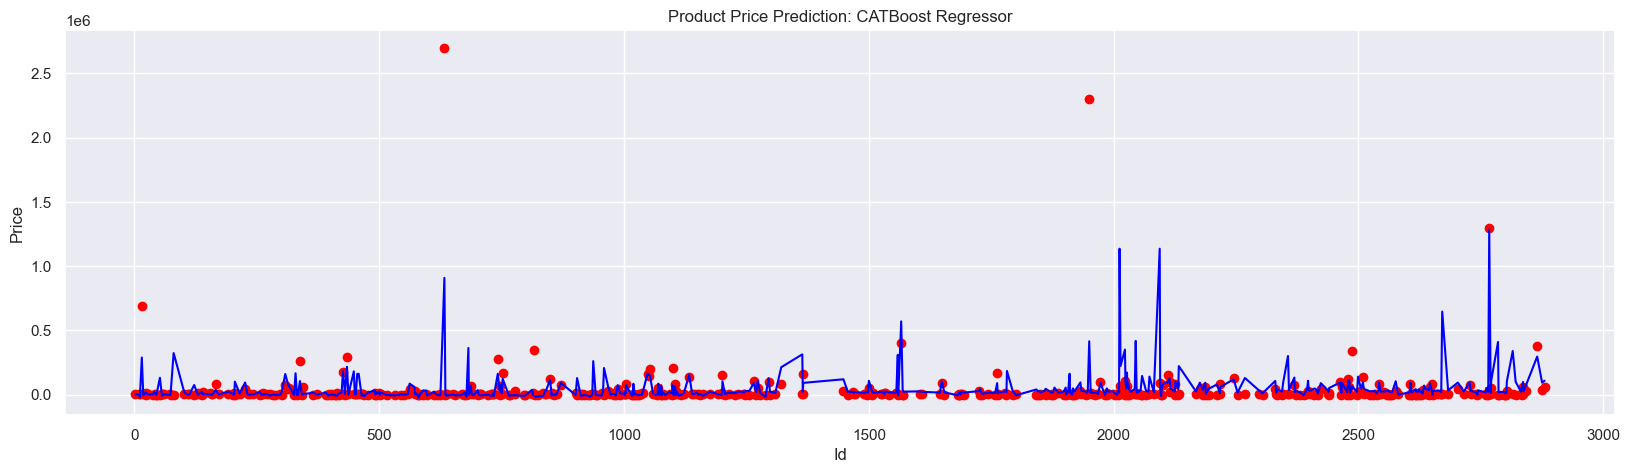

In [57]:
plt.figure(figsize=(20,5))
plt.scatter(X_valid.index,Y_valid,color='red')
sns.lineplot(X_valid.index,Y_pred_CAT,color='blue')
plt.title('Product Price Prediction: CATBoost Regressor')
plt.xlabel('Id')
plt.ylabel('Price')
plt.show()

In [58]:
print('Mean Absolute Error:',mean_absolute_error(Y_valid,Y_pred_CAT))
print('R2 Score:',r2_score(Y_valid,Y_pred_CAT))
print('Mean Squared Error:',mean_squared_error(Y_valid,Y_pred_CAT))
print('Final Score:',(r2_score(Y_valid,Y_pred_CAT)*100)/(mean_squared_error(Y_valid,Y_pred_CAT)+mean_absolute_error(Y_valid,Y_pred_CAT)))

Mean Absolute Error: 46535.54439447139
R2 Score: 0.24174770512759913
Mean Squared Error: 23623350838.805958
Final Score: 1.0233401288422733e-09


Since, final score of **CAT Boost Regressor** is the highest, so concluding this model for price prediction of test dataset.

# Predicting Product price

In [59]:
test=test_data.copy()

ordinal_encoder=OrdinalEncoder()
test[cat_col]=ordinal_encoder.fit_transform(test_data[cat_col])
test[num_col]=test_data[num_col]

In [60]:
test_scale=pd.DataFrame(scale(test))
test_scale.columns=test.columns
test_scale.index=range(1,len(test_scale)+1)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


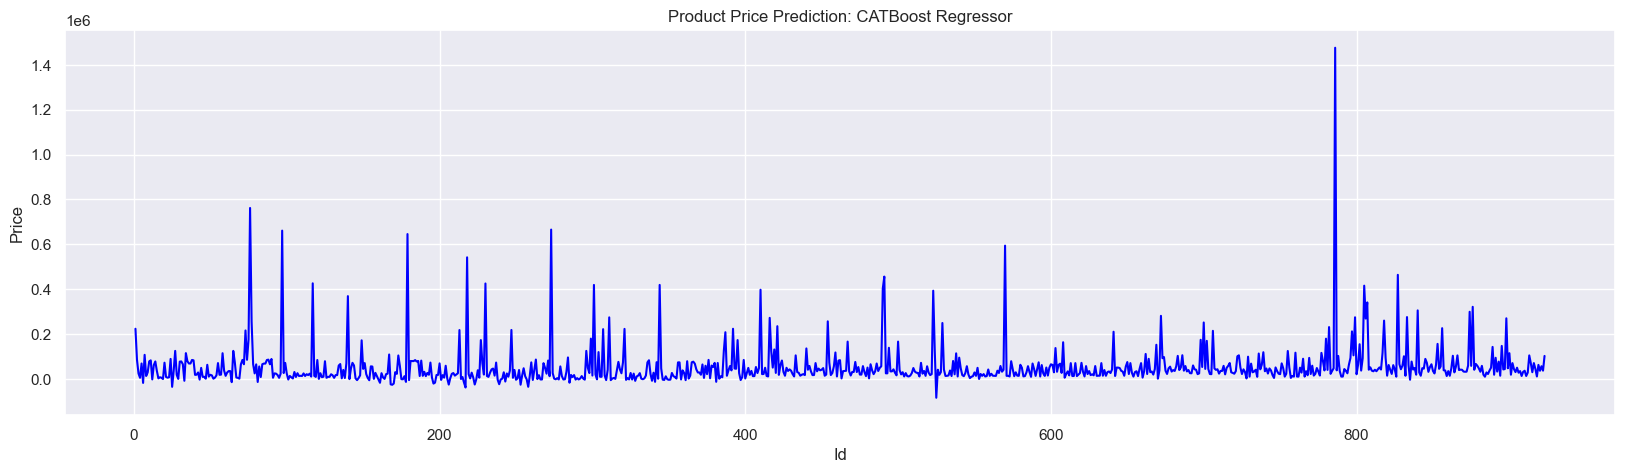

In [61]:
Y_pred_CAT_test=model_CAT.predict(test_scale)
plt.figure(figsize=(20,5))
sns.lineplot(test_scale.index,Y_pred_CAT_test,color='blue')
plt.title('Product Price Prediction: CATBoost Regressor')
plt.xlabel('Id')
plt.ylabel('Price')
plt.show()

In [62]:
test_data['price']=Y_pred_CAT_test
test_data.head()

,Product_name,Product_id,Product_Category,Professional_Publication,Region_address,Local_address,price
1,Comte free fire,40008816,Jeux vidéo et consoles,private,Grand Casablanca,Casablanca,223581.081616
2,Iphone 6 plus,40008815,Téléphones,private,Grand Casablanca,Casablanca,85224.299958
3,Renault,40008814,Voitures,private,Chaouia-Ouardigha,Settat,24090.577176
4,becane,40008811,Motos,private,Fès-Boulemane,Fès,4972.993511
5,Appartement,40008807,Appartements,private,Grand Casablanca,Casablanca,68731.034028
